# Project - Twitter US Airline Sentiment

# **Background and Context:**

Twitter posses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other side, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/services on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand, and their competitors, and discover new trends in the industry.

# **Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

# **Dataset:**

The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone

# **Objective:**

To implement the techniques learned as a part of the course.

# **Learning Outcomes:**

- Basic understanding of text pre-processing
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model
- Evaluate the Model

## Index for Steps and Tasks

[1 - Import the Libraries, Load Dataset, Print Shape of Data, Data Description](#111111)

[2 - Understand of Data Columns](#222222)

[3 - Text Pre-processing: Data Preparation](#333333)

[4 - Vectorization](#444444)

[5 - Fit and Evaluate the Model using both Types of Vectorization](#555555)

[6 - Summarize Understanding of the Application of Various Pre-processing and Vectorization and the Model Performance](#666666)

### Installing Libraries

In [ ]:
pip install --upgrade xgboost

In [ ]:
pip install --upgrade catboost

In [ ]:
pip install --upgrade yellowbrick

In [ ]:
pip install --upgrade bs4

In [ ]:
pip install --upgrade contractions

In [ ]:
pip install --upgrade nltk

In [ ]:
pip install --upgrade gensim

In [ ]:
pip install spacy==3.0.0

In [ ]:
pip install --upgrade wordcloud

In [ ]:
pip install --upgrade emoji

#### Importing Libraries

In [11]:
# Importing all Libraries, Methods and Functions

import warnings
warnings.filterwarnings("ignore") # Do not print any matching warnings

from getpass import getpass # Prompting the user for a password without echoing

from time import time # Used to calculate the running time for a given line of code

from datetime import datetime # Supplies classes for manipulating dates and times

import emoji

import pandas as pd # pandas - manipulation tool for dealing with dataframes
import numpy as np # numpy - tool to compute with and manipulate arrays
from scipy.stats import randint as sp_randint # Object that will return random integers from a specific range (used in Hyperparameters tuning)

import matplotlib.pyplot as plt # matplotlib - plotting library
import seaborn as sns # seaborn - visualization library based on matplotlib

import re, unicodedata # re (Regular Expressions) and unicodedata for text data pre-processing/cleaning

from bs4 import BeautifulSoup # Pull the data out of HTML tags, used for text data pre-processing/cleaning

import contractions # Remove contractions, used for text data pre-processing/cleaning

import nltk # nltk - Natural Language Toolkit
from nltk import word_tokenize # Word tokenization, used for text data pre-processing/cleaning

from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS # Stopwords removal, used for text data pre-processing/cleaning

import spacy # Used for Lemmatization (text data pre-processing/cleaning)

import wordcloud # Used for text data visualization - creation od wordclouds
from wordcloud import WordCloud

from sklearn.pipeline import Pipeline # Sklearn pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Pre-processing vectorization techniques to convert text into a tabular format

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score # Split dataset, model tuning and cross-validation

from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier # Ensemble Classifiers

from xgboost import XGBClassifier # XGBoost Classifier

from catboost import CatBoostClassifier # CatBoost Classifier

from sklearn import metrics # Sklearn - importing metrics for the classification models
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

#### Common Settings

In [12]:
# Common Settings to be used along the Entire Notebook

# seed: random state
seed = 1

# n_Folds: number of folds/splits to be used in Cross-validation
n_Folds = 2

# random_search_samples: number of iterations to be used for Hyperparameters Tunning (Randomized Search Cross-validation)
random_search_samples = 300

# Custom Color Palette (Red, Yellow, Green) for Seaborn
colors = ["#ff0404", "#fbff04", "#04ff15"]
custom_palette = sns.color_palette(colors)

# Display Full Dataframe Information (Non-truncated Text Column)
pd.set_option('display.max_colwidth', None) 

#### Creating Library of Functions

In [13]:
# Countplot with Percentages

def perc_on_bar(feature, color_palette = "RdYlGn", ax = None, label = None):
    feature = feature.dropna()
    sns.set({'figure.figsize': (12, 6)})
    sns.set_style("whitegrid")
    sns.set_style("ticks")
    sns.set_context("notebook")
    total = len(feature)
    ax = sns.countplot(x = feature, order = feature.value_counts().index, palette = color_palette, ax = ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 20, '{:1.2f}'.format(100 * height / total) + "%", ha = "center")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
    ax.set(xlabel = label);

In [ ]:
pip install "https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz"

In [15]:
# Declaring a variable with the English language model
nlp_lemmatization = spacy.load("en_core_web_sm")

ps = nltk.porter.PorterStemmer()

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# Gensim Stopwords

print(sorted(STOPWORDS))

['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'foun

In [17]:
# Text Data Pre-processing

def review_to_words(raw_review, stopwords_add_to_list = [''], stopwords_remove_from_list = ['']):
    
    # 0. Demojize
    no_emojis = emoji.demojize(raw_review)

    # 1. Remove HTML Tags
    no_html = BeautifulSoup(no_emojis, "html.parser").get_text()
    
    # 1.5 Parsing text Emojis
    text_emojis = no_html.replace(':)', 'smiling')
    text_emojis = text_emojis.replace(':-)', 'smiling')
    text_emojis = text_emojis.replace(':-D', 'smiling')
    text_emojis = text_emojis.replace(':D', 'smiling')
    text_emojis = text_emojis.replace(':(', 'frowning')
    text_emojis = text_emojis.replace(':(', 'frowning')
    text_emojis = text_emojis.replace('<3', 'heart')

    # 2. Remove HTTP Links
    no_links = re.sub(pattern = r"http\S+", repl = "", string = text_emojis)
    
    # 3. Remove User Tag @ and its Following Tagged Names/Descriptions
    no_tags = re.sub(pattern = r"@\S+", repl = "", string = no_links)
    
    # 4. Replace Contractions       
    no_contractions = contractions.fix(no_tags)
    
    # 5. Remove non-letters (Including Removal of any Digits)       
    letters_only = re.sub(pattern = r"[^a-zA-Z]", repl = " ", string = no_contractions)
    
    # 6. Remove Accented (non-ASCII) Characters
    no_accented = unicodedata.normalize('NFKD', letters_only).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # 7. Convert to lower Case
    words_lower = no_accented.lower()
    
    # 8. Remove Stopwords thru Gensim
    text_tokens = word_tokenize(words_lower)
    all_stopwords_gensim = STOPWORDS.difference(stopwords_remove_from_list)
    all_stopwords_gensim = all_stopwords_gensim.union(set(stopwords_add_to_list))
    tokens_without_sw = [word for word in text_tokens if not word in all_stopwords_gensim]
    meaningful_words = " ".join(tokens_without_sw)
    
    # 9. Lemmatization thru spaCy
    lemmat = nlp_lemmatization(meaningful_words) # Lemmatization (Encode the text into a spaCy object - mandatory step)
    lemmatization = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in lemmat]) # Lemmatization                                  
    
    return(lemmatization)

In [18]:
# Function to get a Confusion in a Heatmap Format including Percentages

def make_confusion_matrix(model, X_test, y_test, plot_title = None, summary_metrics = True, library = 'sklearn', axis_labels = ('negative', 'neutral', 'positive')):
    
    # If predicting using the Sklearn wrapper with a Keras model, then the prediction is already coming as a single class (no need to use 'argmax')
    # If predicting directly thru Keras then 'predict_classes' is used to obtain a single class from the vector of percentages (which is equivalent to 'argmax')
    if library == 'sklearn':
      y_pred = model.predict(X_test)
    elif library == 'keras':
      y_pred = model.predict_classes(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels = axis_labels)
    group_counts = cm.flatten()
    group_percentages = np.round(100 * group_counts / np.sum(group_counts), 2)
    
    labels = [f"{v1}\n{v2}%" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(axis_labels), len(axis_labels))
    
    plt.figure(figsize = (16, 8))
    sns.set_context("notebook")
    g = sns.heatmap(cm, annot = labels,  fmt = '', xticklabels = axis_labels, yticklabels = axis_labels)
    g.set_ylim(len(axis_labels), 0)
                                        
    plt.ylabel('True Label')
    
    plt.xlabel('Predicted label') 
    plt.title(plot_title)
    plt.show()

    # Creating a global variable for the Accuracy Score to make it callable outside the function
    global model_accuracy
    model_accuracy =  accuracy_score(y_test, y_pred)
      
    # Summary Metrics
    if summary_metrics:
        cr = metrics.classification_report(y_true = y_test, y_pred = y_pred, digits = 4)
        print("\n" + cr)

In [19]:
# Generating a Wordcloud for General Purpose
# Bigrams must have a Dunning likelihood collocation score greater than THE "collocation_threshold" to be counted as bigrams. 
# Because the default "collocation_threshold" of 30 is arbitrary, this parameter was switched to 10 since it seemed to better capture the bigrams for this dataset.
# Bigrams like "customer service", "flight delay", "flight cancel" etc can be captured by properly setting the "collocation_threshold" parameter.

def show_wordcloud(corpus, plot_title, additional_stopwords = [""], mask = None, color = 'white'):
    text = ' '.join(corpus.astype(str).tolist())
    fig_wordcloud = wordcloud.WordCloud(stopwords = additional_stopwords, background_color = color, colormap = 'viridis', width = 800, 
                                        height = 600, random_state = seed, mask = mask, contour_width = 3, collocations = True, collocation_threshold = 10).generate(text)
    plt.figure(figsize = (14, 11), frameon = True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(plot_title + "\n", fontsize = 30)
    plt.show()

In [20]:
# Generating a Wordcloud with Word Frequencies related to Features Importance

def show_wordcloud_with_frequency(dictionary, plot_title, additional_stopwords = [""], mask = None, color = 'white'):
    fig_wordcloud = wordcloud.WordCloud(stopwords = additional_stopwords, background_color = color, colormap = 'viridis', width = 800, 
                                        height = 600, random_state = seed, mask = mask, contour_width = 3).generate_from_frequencies(dictionary)
    plt.figure(figsize = (14, 11), frameon = True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(plot_title + "\n", fontsize = 30)
    plt.show()

In [21]:
#  Function to Calculate and Plot Features Importance

def features_importance(model, number_features):
    fi = pd.DataFrame(model.feature_importances_, columns = ["Importance"], index = X_train_.columns).reset_index().sort_values(by = 'Importance', ascending = False)
    fi = fi.iloc[0 : number_features + 1, ]
    # Features Importance
    sns.set({'figure.figsize': (12, 16)})
    sns.set_style("whitegrid")
    sns.set_style("ticks")
    sns.set_context("notebook")
    total = fi['Importance'].sum()
    g = sns.barplot(x = "Importance", y = "index", order = fi['index'], orient = 'h', data = fi)
    sns.despine()
    for p in g.patches:
        g.text(x = p.get_width() + 0.00005, y = p.get_y() + p.get_height() / 2, s = '{:1.2f}'.format(100 * p.get_width() / total) + "%", va = "center")
    g.set(ylabel = None)
    plt.title('Features Importance');

***
## 1 - Import the Libraries, Load Dataset, Print Shape of Data, Data Description <a class="anchor" id="111111"></a>

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
- Add your view and opinion along with the problem statement, shape of the data, data description.

### 1.1 - Problem Statement and Business Objective

- Problem Statement:
    - Twitter is a 'microblogging' system that allows you to send and receive short posts called tweets. Tweets can be up to 140 characters long and can include links to  relevant websites and resources. It has around 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other side, there’s so much information that it’s difficult for Airline Companies to quickly detect positive or negative social mentions.
    

- Business Objective:
    - Sentiment Analysis/Classification is a useful task in Natural Language Processing. It involves monitoring emotions in conversations on social media platforms and it became a key strategy in Social Media Marketing. Some important decisions can be made based on the fundamental of big data analytics. The skill of performing Sentiment Analysis using Twitter data may be essential to quickly capture the VOC (Voice of the Customer). The main business objective is to build an analytical for Sentiment Analysis enabling Airline Companies to classify the Customer mentions in Twitter into negative, neutral or positive categories. This information can be potentially leveraged to promote or improve the business at the Airline Companies.

### 1.2 - Import the Libraries

- All Libraries were installed and loaded (imported) at the previous session.

- Some common settings used more frequently along the notebook were also defined at the previous session:
    - seed: random state
    - n_Folds: number of folds/splits to be used in Cross-validation
    - random_search_samples: number of iterations to be used for Hyperparameters Tunning (Randomized Search Cross-validation)
    - custom_palette: custom color palette (Red, Yellow, Green) for Seaborn
    - Display full dataframe information (non-truncated text column)
    

- At the previous session, a HTTP Proxy was created to get access to spaCy's model for Lemmatization (English Dictionary "en_core_web_sm-3.0.0").

- Also at the previous session, a library of functions ("def" functions) was also created to support in several steps alsong this project:
    - def perc_on_bar(): Countplot with Percentages
    - review_to_words(): Text Data Pre-processing
    - make_confusion_matrix(): creates a Confusion Matrix in a Heatmap format including percentages 
    - show_wordcloud(): generates a Wordcloud for a given dataset
    - show_wordcloud_with_frequency(): generates a Wordcloud with word Frequencies related to Features Importance
    - features_importance(): calculates and plots Features Importance for Classification Models

### 1.3 - Load Dataset

In [22]:
# Mounting the Drive in Google Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Loading Dataset Stored in Google Drive

tweets = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_NLP/Tweets.csv")
tweets.head(20)

tweet_id  ...               user_timezone
0   570306133677760513  ...  Eastern Time (US & Canada)
1   570301130888122368  ...  Pacific Time (US & Canada)
2   570301083672813571  ...  Central Time (US & Canada)
3   570301031407624196  ...  Pacific Time (US & Canada)
4   570300817074462722  ...  Pacific Time (US & Canada)
5   570300767074181121  ...  Pacific Time (US & Canada)
6   570300616901320704  ...  Pacific Time (US & Canada)
7   570300248553349120  ...  Pacific Time (US & Canada)
8   570299953286942721  ...  Pacific Time (US & Canada)
9   570295459631263746  ...  Eastern Time (US & Canada)
10  570294189143031808  ...  Eastern Time (US & Canada)
11  570289724453216256  ...            America/New_York
12  570289584061480960  ...            America/New_York
13  570287408438120448  ...  Eastern Time (US & Canada)
14  570285904809598977  ...  Pacific Time (US & Canada)
15  570282469121007616  ...  Pacific Time (US & Canada)
16  570277724385734656  ...  Pacific Time (US & Canada)
17  570276917301137409  ...  Eastern Time (US & Canada)
18  570270684619923457  ...      Atlantic Time (Canada)
19  570267956648792064  ...                       Quito

[20 rows x 15 columns]

### 1.4 - Print Shape of the Data

In [24]:
# Checking the Data Shape

tweets.shape

(14640, 15)

- There are total 15 columns and 14640 rows in the dataset.

### 1.5 - Data Description

In [25]:
# Checking Data Types

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

- The data types for all the columns are either integer, float or object.

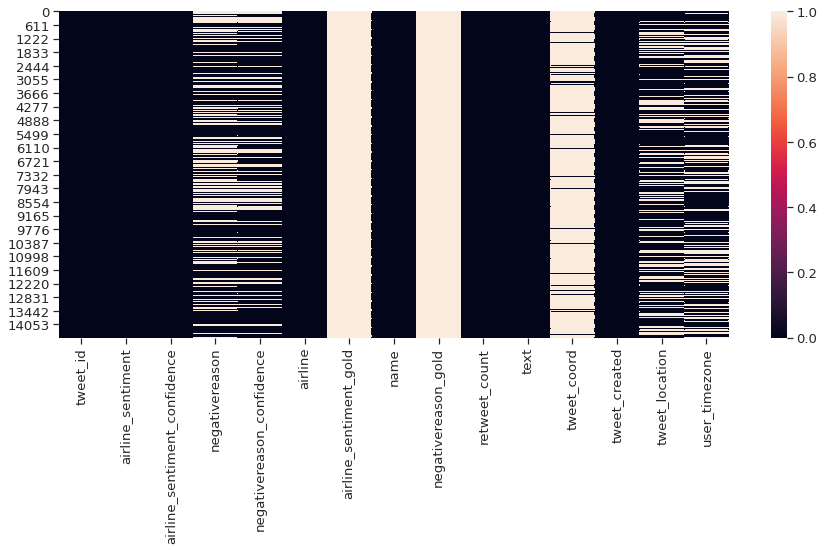

In [26]:
# Checking the Columns with Null Values

sns.set({'figure.figsize': (15, 6)})
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale = 1.2)
sns.heatmap(tweets.isnull());

- There are several columns with missing values. However, as per the directions given at "Steps and Tasks", all other columns excepting 'text' and 'airline_sentiment' must be dropped. Before dropping the columns, some Exploratory Data Analysis will be conducted - see next steps.

### 1.6 - Exploratory Data Analysis

In [27]:
# Check Uniques Categories Values for 'airline_sentiment'

print(tweets['airline_sentiment'].value_counts(normalize = False))

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


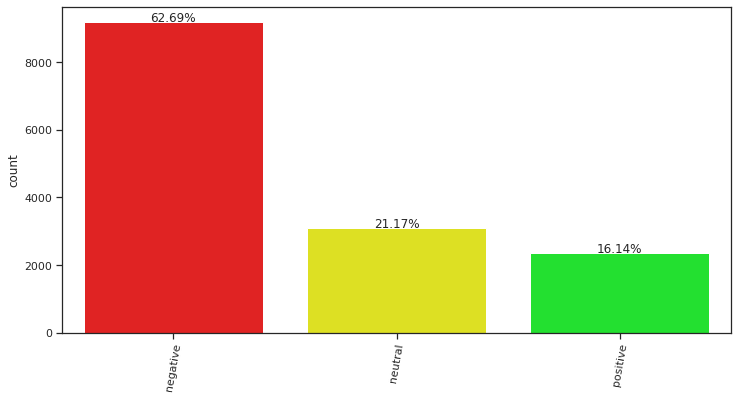

In [28]:
# Visualizating the Dependent Variable ('airline_sentiment') Distribution of Classes

perc_on_bar(feature = tweets['airline_sentiment'], color_palette = custom_palette)

- 'airline_sentiment' is the Dependent Variable for the Classification Model, having 03 distinct categories: 'Negative', 'Neutral' and 'Positive'. There is a relevant imbalance on the classes distribution for 'airline_sentiment', with 62.69% of data associated with 'negative', 21.17% associated with 'neutral' and 16.14% of the data associated with 'positive' sentiments.

In [29]:
# Creating a Cross-tabulation Matrix between 'airline_sentiment' and 'negativereason'

pd.crosstab(tweets['airline_sentiment'], tweets['negativereason'])

negativereason     Bad Flight  Can't Tell  ...  Lost Luggage  longlines
airline_sentiment                          ...                         
negative                  580        1190  ...           724        178

[1 rows x 10 columns]

- Based on the matrix above, the 'negativereason' is only connected to 'negative' 'airline_sentiment'. This is what was expected, however it was confirmed with the cross-tabulation matrix above.

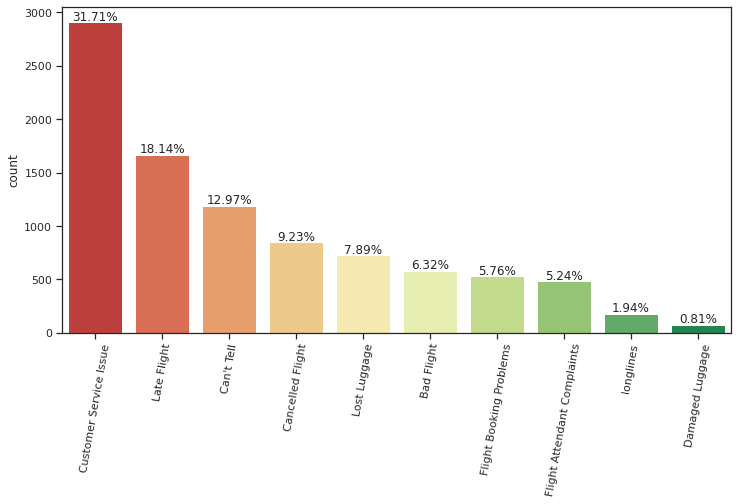

In [30]:
# Visualizating the Freqeuncies for 'negativereason'

perc_on_bar(feature = tweets['negativereason'])

- Looking at the Barplot above, there are 10 categories associated with the reasons the Customers expressed their negative sentiments. The 'Customer Service Issue' is the most frequent reason with 31.71% of the occurrences. For the top 05 ocurrences, the 'Customer Service Issue' was followed by "Late Flight", "Can't Tell", "Cancelled Flight" and "Lost Luggage" with 18.14%, 12.97%, 9.23% and 7.89% respectively.

- These negative reasons will be compared to the pre-processed corpus ('text') filtered by 'negative' sentiment along the next steps of this notebook. A Wordcloud will be used to support this comparison.

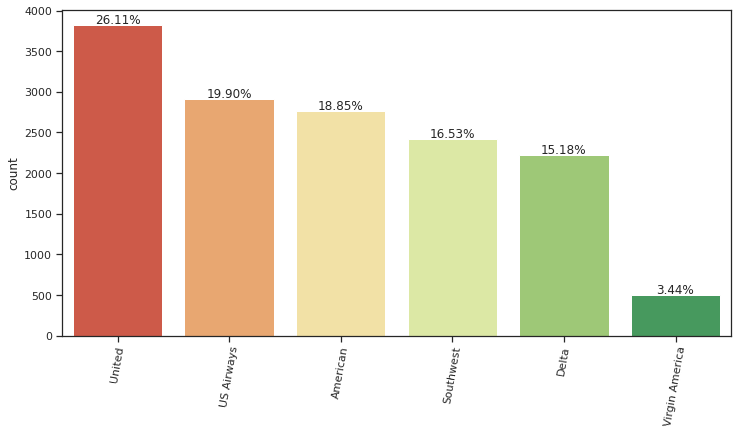

In [31]:
# Visualizating the Percentage of Tweets by Airline Company ('airline')

perc_on_bar(feature = tweets['airline'])

- The airline companies with most of the tweets are 'United', 'US Airways' and 'American', with 26.11%, 19.90% and 18.85% of the occurrences, respectively.

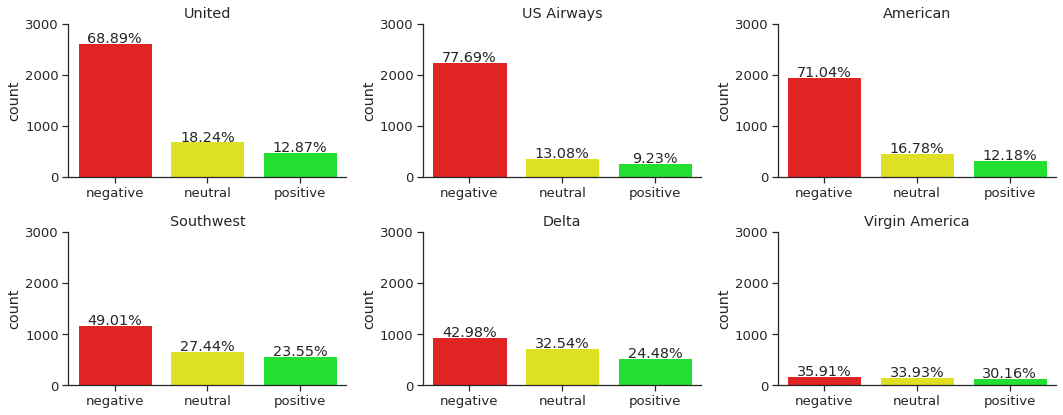

In [32]:
# Visualizating the Distribution of Sentiment ('airline_sentiment' - 'negative', 'positive' or 'neutral') by Airline Company ('airline')

features = tweets['airline'].value_counts().index
features = features.dropna()

sns.set({'figure.figsize': (15, 6)})
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale = 1.2)

for i, variable in enumerate(features):
    plt.subplot(2, 3, i + 1)
    x  = tweets[(tweets['airline'] == features[i])]['airline_sentiment'].dropna()
    total = len(x)
    ax = sns.countplot(x = x, order = x.value_counts().index, palette = custom_palette)
    sns.despine()
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 5, '{:1.2f}'.format(100 * height / total) + "%", ha = "center")
    
    plt.ylim(0, 3000)
    ax.set(xlabel = None)
    plt.tight_layout()
    plt.title(variable);

- The airline companies with most of the tweets ('United', 'US Airways' and 'American') are also the ones with the highest percentage of 'negative' sentiments. 'United', 'US Airways' and 'American' have 68.89%, 77.69% and 71.04% of 'negative' sentiments, respectively.

- 'Southwest' and 'Delta' have an intermediate number of tweets, with 49.01% and 42.98% of negative sentiments respectively.

- 'Virgin America' has the least amount of tweats and the highest percentage of 'positive' sentiments (30.16%), and the lowest percentage of 'negative' sentiments (35.91%).

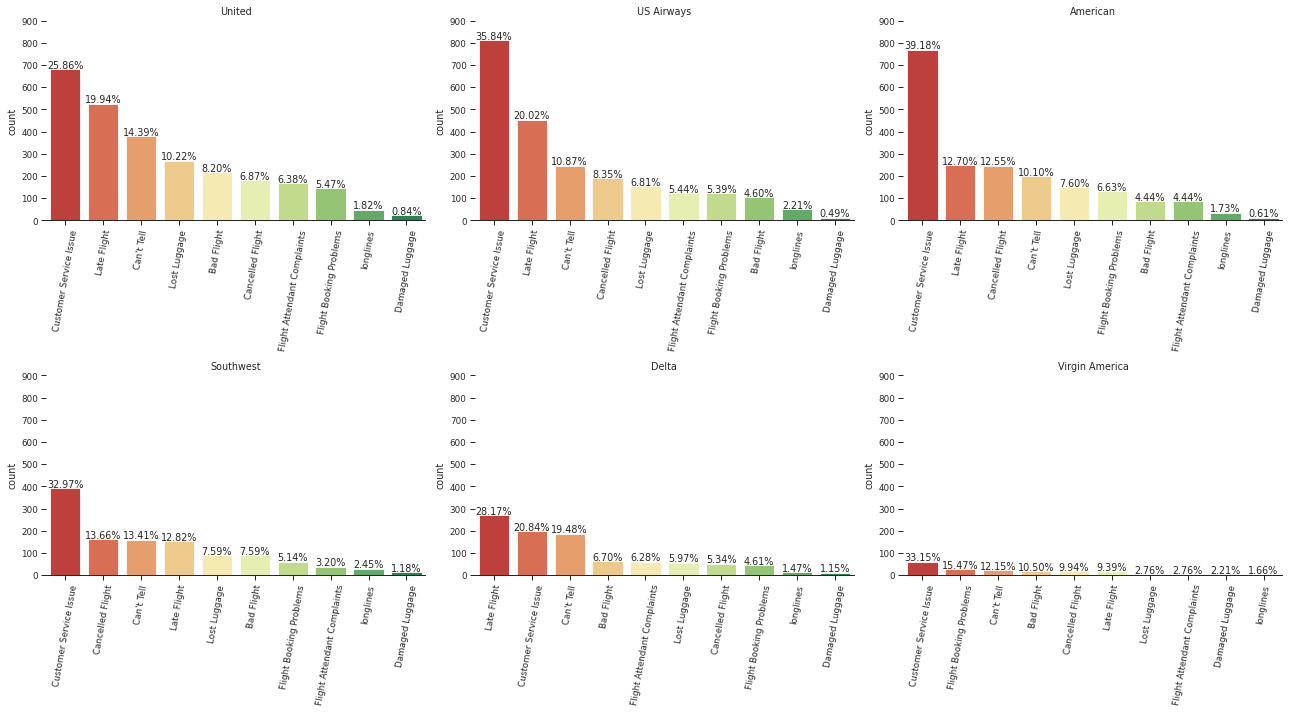

In [33]:
# Visualizating the Distribution of Negative Sentiment Reason ('negativereason') by Airline Company ('airline')

features = tweets['airline'].value_counts().index
features = features.dropna()

sns.set({'figure.figsize': (18, 10)})
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("paper")

for i, variable in enumerate(features):
    plt.subplot(2, 3, i + 1)
    x  = tweets[(tweets['airline'] == features[i])]['negativereason'].dropna()
    total = len(x)
    ax = sns.countplot(x = x, order = x.value_counts().index, palette = "RdYlGn")
    sns.despine(left = True)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 5, '{:1.2f}'.format(100 * height / total) + "%", ha = "center")
    
    plt.ylim(0, 900)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
    ax.set(xlabel = None)
    plt.tight_layout()
    plt.title(variable);

- The negative reason with highest percentage for the airline companies with most of the tweets ('United', 'US Airways' and 'American') is 'Customer Service Issue', with 25.86%, 35.84% and 39.18% respectively. For these same airline companies, the second most frequent negative reason is 'Late Flight', however the frequency of late flights for 'American' (12.70%) is considerably lower than the frequency of late flights for 'United' (19.94%) and 'US Airways' (20.02%).

- For 'Delta', the frequency of negative reasons related to late flights (28.17%) is much higher compared to the other airline companies. Conversely to that, 'Virgin America' takes the lowest frequency of negative reasons related to late flights (9.39%) compared to the other airline companies.

In [34]:
# Converting tweets['tweet_created'] into a 'datatime' Format

tweets['tweet_created'] = pd.to_datetime(tweets['tweet_created'])

In [35]:
# Creating more Columns by using the Inbuilt Functionalities of 'datatime'

tweets['year'] = tweets['tweet_created'].dt.year
tweets['day'] = tweets['tweet_created'].dt.day
tweets['date'] = tweets['tweet_created'].dt.date
tweets['hour'] = tweets['tweet_created'].dt.hour
tweets['weekday'] = tweets['tweet_created'].apply(lambda x : datetime.strftime(x,'%a'))
tweets['calendar_month'] =  tweets['tweet_created'].apply(lambda x : datetime.strftime(x,'%b'))

In [36]:
# Checking Data Types after Converting 'tweet_created' to 'datetime' and creating additional placeholders for date/time information

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   tweet_id                      14640 non-null  int64                                 
 1   airline_sentiment             14640 non-null  object                                
 2   airline_sentiment_confidence  14640 non-null  float64                               
 3   negativereason                9178 non-null   object                                
 4   negativereason_confidence     10522 non-null  float64                               
 5   airline                       14640 non-null  object                                
 6   airline_sentiment_gold        40 non-null     object                                
 7   name                          14640 non-null  object                        

In [37]:
# Creating a Cross-tabulation Matrix between 'date' and 'weekday'

pd.crosstab(tweets['date'], tweets['weekday'])

weekday      Fri   Mon   Sat   Sun   Thu   Tue   Wed
date                                                
2015-02-16     0     4     0     0     0     0     0
2015-02-17     0     0     0     0     0  1408     0
2015-02-18     0     0     0     0     0     0  1344
2015-02-19     0     0     0     0  1376     0     0
2015-02-20  1500     0     0     0     0     0     0
2015-02-21     0     0  1557     0     0     0     0
2015-02-22     0     0     0  3079     0     0     0
2015-02-23     0  3028     0     0     0     0     0
2015-02-24     0     0     0     0     0  1344     0

In [38]:
# Time the first 04 tweets were created on 2015-02-16

tweets[(tweets['day'] == 16)]

tweet_id airline_sentiment  ...  weekday calendar_month
4324  567592368451248130          negative  ...      Mon            Feb
4325  567591480085463040          negative  ...      Mon            Feb
8964  567590027375702016          negative  ...      Mon            Feb
8965  567588278875213824           neutral  ...      Mon            Feb

[4 rows x 21 columns]

- Looking at the cross-tabulation matrix above, it can be seen that all the tweets were created between 2015-02-16(Mon) and 2015-02-24(Tue).

- There were only 04 tweets created at 2015-02-16, and they were created later in the night (past 11pm).

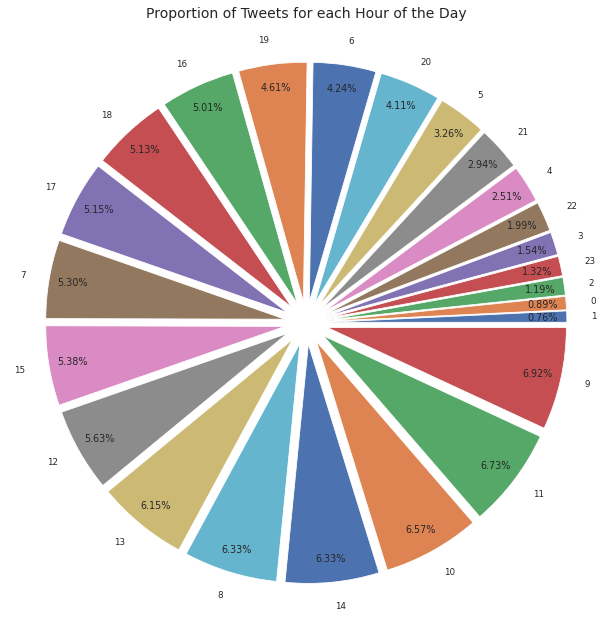

In [39]:
# Pie Chart with the Proportion of Tweets per each Hour of the Day
# Using Matplotlib (Pie Charts not Available in Seaborn)

Category = tweets['hour'].value_counts().sort_values()
pie, ax = plt.subplots(figsize = [20, 11])
labels = Category.keys()
plt.pie(x = Category, autopct = "%.2f%%", explode = [0.09]*24, labels = labels, pctdistance = 0.9)
plt.title("Proportion of Tweets for each Hour of the Day", fontsize = 14);

- The most frequent hours for tweets are overlapping with the regular business hours (7am - 6pm).

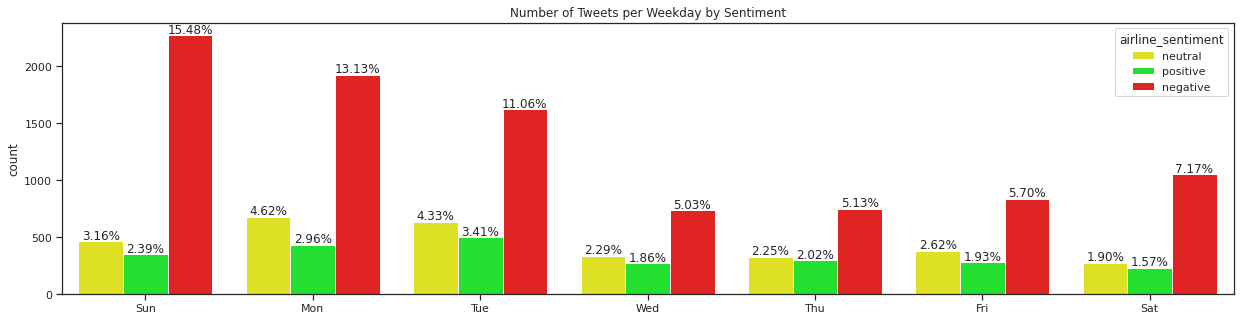

In [40]:
# Countplot with the Tweets across the days of the week ('weekday') by Sentiment ('airline_sentiment')

sns.set({'figure.figsize': (21, 5)})
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook")

total = float(len(tweets))
ax = sns.countplot(x = 'weekday', order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], hue = 'airline_sentiment', 
                   data = tweets, palette = ["#fbff04", "#04ff15", "#ff0404"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 20, '{:1.2f}'.format(100 * height / total) + "%", ha = "center")

plt.title("Number of Tweets per Weekday by Sentiment")
ax.set(xlabel = None);

- The number of tweets related to all Airline Companies is skewed towards the end of the week.

- looking at the Counplot above, the total frequency of tweets and the frequency of 'negative' sentiments is much higher along the 03 first days of the week ('Sun', 'Mon' and 'Tue'). This might be an important pattern to be further explored to prioritize improvement actions on those specific days of the week.

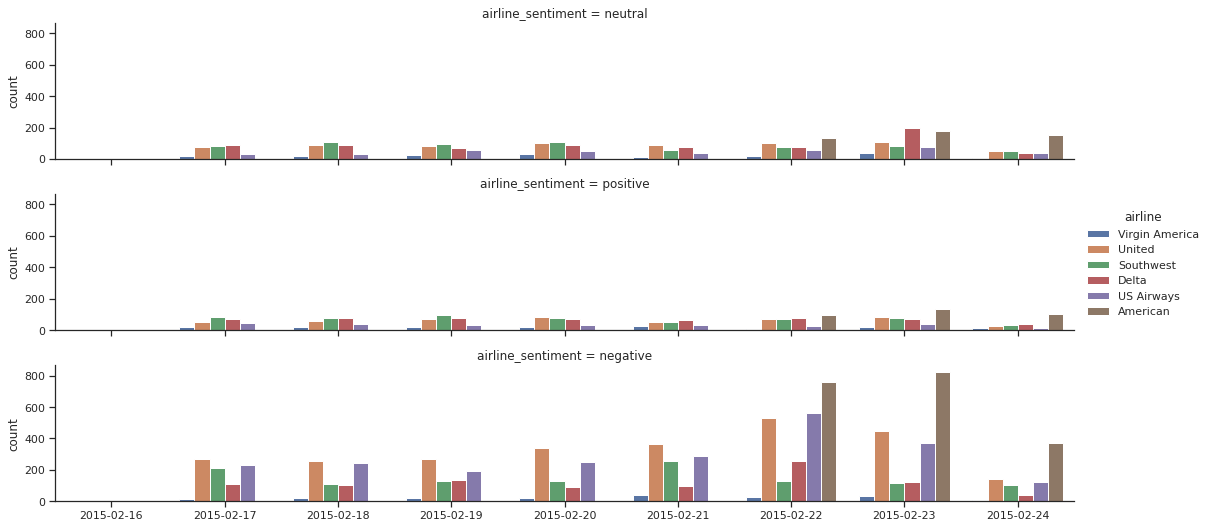

In [41]:
# Catplot with the Tweets across the days ('date') by Sentiment ('airline_sentiment') and by Airline Company ('airline')

sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook")

ax = sns.catplot(x = "date", row = "airline_sentiment", order = sorted(tweets['date'].unique()), 
                 hue = 'airline', data = tweets, kind = 'count', height = 2.5, aspect = 6)

ax.set(xlabel = None);

- The data was collected along 09 consecutive days in Feb 2015 (02/16/2015 to 02/24/2015).

- Looking at the Catplot above, most of the tweets associated to 'American' started to happen on 2015-02-22. On the dates before that (from 2015-02-16 to 2015-02-21) there were almost no tweets related to 'American'. The number of 'negative' tweets from 'American' (from 2015-02-22 to 2015-02-04) were much higher than the number of 'negative' tweets related to the other airline companies.

- From 2015-02-17 to 2015-02-21, 'United' had the highest number of 'negative' tweets.

***
## 2 - Understand of Data Columns <a class="anchor" id="222222"></a>

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
- Drop all other columns excepting 'text' and 'airline_sentiment'.
- Check the shape of the data.
- Print the first 5 rows of data.

### 2.1 - Drop all other columns excepting 'text' and 'airline_sentiment'

In [42]:
# Drop all other columns excepting 'text' and 'airline_sentiment'

data = tweets[['text', 'airline_sentiment']]

- A new dataset called 'data' was created only containing 'text' and 'airline_sentiment'. All the other columns were dropped for this new dataset.

### 2.2 - Check the Shape of the Data

In [43]:
# Checking Data Shape

data.shape

(14640, 2)

- By dropping all other columns excepting 'text' and 'airline_sentiment', the dataset shape is now at 02 columns and 14640 rows.

### 2.3 - Print the First 05 Rows of Data

In [44]:
# Printing the First 05 Rows of the Dataset

data.head(20)

text airline_sentiment
0                                                                                                            @VirginAmerica What @dhepburn said.           neutral
1                                                                       @VirginAmerica plus you've added commercials to the experience... tacky.          positive
2                                                                        @VirginAmerica I didn't today... Must mean I need to take another trip!           neutral
3                 @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse          negative
4                                                                                        @VirginAmerica and it's a really big bad thing about it          negative
5       @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA          negative
6                                                                @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)          positive
7                                   @VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP           neutral
8                                                                                                @virginamerica Well, I didn't…but NOW I DO! :-D          positive
9                                                               @VirginAmerica it was amazing, and arrived an hour early. You're too good to me.          positive
10                                               @VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24           neutral
11                                                           @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D          positive
12   @VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p          positive
13  @VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn          positive
14                                                                                                                        @VirginAmerica Thanks!          positive
15                                                                                                 @VirginAmerica SFO-PDX schedule is still MIA.          negative
16  @VirginAmerica So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America. #29DaysToGo          positive
17     @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!          negative
18                                                                                                               I ❤️ flying @VirginAmerica. ☺️👍          positive
19                                   @VirginAmerica you know what would be amazingly awesome? BOS-FLL PLEASE!!!!!!! I want to fly with only you.          positive

- 'text' is the column at the dataset which represents the indepedent variables for the Classification model. This column will be pre-processed along the next steps of this notebook.

- 'air_sentiment' is the dependent variable for the Sentiment Analysis Classification model.

***
## 3 - Text Pre-processing: Data Preparation <a class="anchor" id="333333"></a>

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
- NOTE: Each text pre-processing step should be mentioned in the notebook separately
    - Html Tags Removal
    - Tokenization
    - Remove the Numbers
    - Removal of Special Characters and Punctuations
    - Removal of Stopwords
    - Conversion to Lowercase
    - Lemmatize or Stemming
    - Join the words in the list to convert back to text string in the data frame
    - Print the first 5 rows of data after pre-processing

- A user defined ('def') function called 'review_to_words()' was previously created to perform all the necessary steps for text pre-processing. All the pre-processing steps consist on:
    > 1. Remove HTML Tags ('BeautifulSoup' library)
    > 2. Remove HTTP Links (thru Python Regular Expression operations)
    > 3. Remove User Tag @ and its following tagged name/description (thru Python Regular Expression operations)
    > 4. Replace Contractions ('contractions' library)
    > 5. Remove non-letters including removal of any digits (thru Python Regular Expression operations)
    > 6. Remove Accented (non-ASCII) Characters (thru Python Unicode operations)
    > 7. Convert to Lower Case (thru Python 'lower()' operation)
    > 8. Remove Stopwords ('Gensim' library to apply the stopwords, 'nltk' library to apply words tokenization and Python '.join()' operation)
    > 9. Lemmatization ('spaCy' library)
    
    
- However, because of the note above ('NOTE: Each text pre-processing step should be mentioned in the notebook separately'), each pre-processing steps will be split in separate line of code.

### 3.1 - Text Pre-processing/Cleaning (Each Step Mentioned Separately)

In [45]:
# Text Pre-processing using the 'review_to_words()' Function <<LEFT HERE JUST AS A REFERENCE>>

# Start Counting the Running Time
tic = time()

# Setting a list of exceptions for stopwords that may potentially influence the Sentiment Analysis
stopwords_remove = ['against', 'alone', 'always', 'behind', 'below', 'but', 'cry', 'first', 'full', 'last', 'least',
                    'less', 'neither', 'never', 'no', 'nobody', 'none', 'nor', 'not', 'nothing', 'nowhere', 'well']

stopwords_add = ['airplane', 'airplanes', 'plane', 'planes', 'flight', 'flights', 'flighting', 'flightling', 'flighted', 'flightled']

# Data Pre-processing using a pre-created 'def' function 'review_to_words()'
data['Text Pre-processed'] = data['text'].apply(lambda x: review_to_words(raw_review = x, stopwords_remove_from_list = stopwords_remove, stopwords_add_to_list = stopwords_add))

# Time in seconds taken to complete the pre-processing stage
Pre_processing_time = time() - tic
print("done in {:.3f}s".format(Pre_processing_time))

done in 102.578s


- The subset of words 'stopwords_remove_from_list' comprised of the words considered important to differentiate 'negative' and 'positive' sentiments in the Classification model, therefore this subset of words weren't removed from the corpus.

- The subset of words 'stopwords_add_to_list' comprised of the words not considered important for the Sentiment Analysis. This subset of words was basically connected to the root word "flight" and other variants (not necessarily grammaticaly correct) present in the corpus. These words were decided to the added to the list of Stopwords because they don't add value to the data Classification.

In [46]:
# Printing the First 05 Rows of the Dataset

data.head(20)

text  ...                                                                        Text Pre-processed
0                                                                                                            @VirginAmerica What @dhepburn said.  ...                                                                                       say
1                                                                       @VirginAmerica plus you've added commercials to the experience... tacky.  ...                                                      plus add commercial experience tacky
2                                                                        @VirginAmerica I didn't today... Must mean I need to take another trip!  ...                                                                  not today mean need trip
3                 @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse  ...                       aggressive blast obnoxious entertainment guest face little recourse
4                                                                                        @VirginAmerica and it's a really big bad thing about it  ...                                                                             big bad thing
5       @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA  ...                                              seriously pay seat not play bad thing fly va
6                                                                @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)  ...                                            yes nearly time fly vx ear worm not away smile
7                                   @VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP  ...                                                     miss prime opportunity man hat parody
8                                                                                                @virginamerica Well, I didn't…but NOW I DO! :-D  ...                                                                        well not but smile
9                                                               @VirginAmerica it was amazing, and arrived an hour early. You're too good to me.  ...                                                            amazing arrive hour early good
10                                               @VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24  ...                                                       know suicide second lead death teen
11                                                           @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D  ...                                       heart pretty graphic well minimal iconography smile
12   @VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p  ...                                              great deal thinking nd trip not go st trip p
13  @VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn  ...                                             fly fabulous seductive sky stress away travel
14                                                                                                                        @VirginAmerica Thanks!  ...                                                                                     thank
15                                                                                                 @VirginAmerica SFO-PDX schedule is still MIA.  ...                                                                      sfo pdx schedule mia
16  @VirginAmerica So excited for my first cross country fli

- At the dataframe above, looking at the 'Text Pre-processed' and comparing it with the 'text' column it can be concluded the pre-processing/cleaning process worked as expected. The 'Text Pre-processed' column will be used for building the Classification models along the next steps.

### 3.2 - Text Pre-processing Exploratory Data Analysis

Mean Number of Words in Pre-processed Corpus for Negative Sentiment = 8.6
Mean Number of Words in Pre-processed Corpus for Neutral Sentiment  = 6.33
Mean Number of Words in Pre-processed Corpus for Positive Sentiment = 6.82



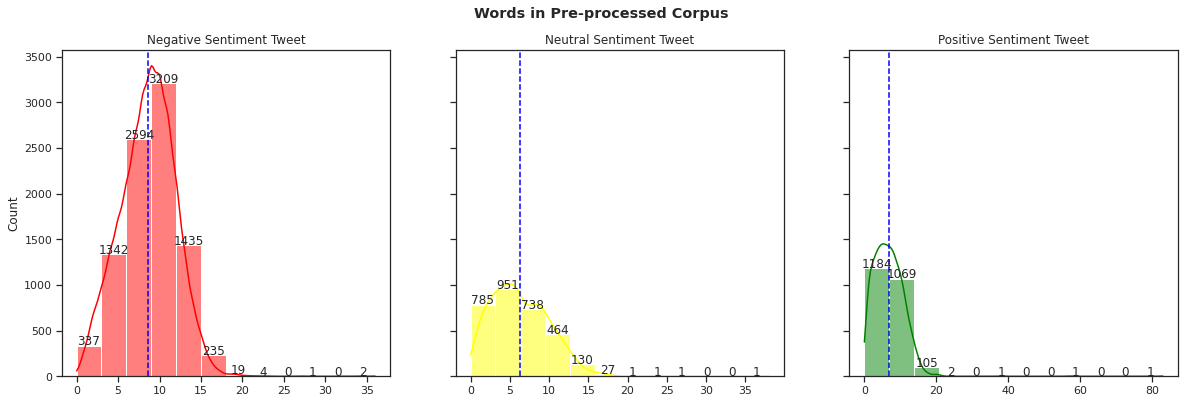

In [47]:
# Number of Words in in Pre-processed Corpus by 'airline_sentiment'

sns.set({'figure.figsize': (20, 6)})
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook")
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)

tweet_len_neg = data[data['airline_sentiment'] == 'negative']['Text Pre-processed'].str.split().map(lambda x: len(x))
a = sns.histplot(tweet_len_neg, kde = True, bins = 12, color = 'red', ax = ax1)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x() + p.get_width() / 2, height + 5, '{}'.format(height), ha = "center")
a.set_title('Negative Sentiment Tweet')
a.axvline(np.mean(tweet_len_neg), color = 'blue', linestyle = '--') # Add mean to the histogram
a.set(xlabel = None)

tweet_len_neu = data[data['airline_sentiment'] == 'neutral']['Text Pre-processed'].str.split().map(lambda x: len(x))
b = sns.histplot(tweet_len_neu, kde = True, bins = 12, color = 'yellow', ax = ax2)
for p in b.patches:
    height = p.get_height()
    b.text(p.get_x() + p.get_width() / 2, height + 5, '{}'.format(height), ha = "center")
b.set_title('Neutral Sentiment Tweet')
b.axvline(np.mean(tweet_len_neu), color = 'blue', linestyle = '--') # Add mean to the histogram
b.set(xlabel = None)

tweet_len_pos = data[data['airline_sentiment'] == 'positive']['Text Pre-processed'].str.split().map(lambda x: len(x))
c = sns.histplot(tweet_len_pos, kde = True, bins = 12, color = 'green', ax = ax3)
for p in c.patches:
    height = p.get_height()
    c.text(p.get_x() + p.get_width() / 2, height + 5, '{}'.format(height), ha = "center")
c.set_title('Positive Sentiment Tweet')
c.axvline(np.mean(tweet_len_pos), color = 'blue', linestyle = '--') # Add mean to the histogram
c.set(xlabel = None)

fig.suptitle('Words in Pre-processed Corpus', fontweight = "bold");

print("Mean Number of Words in Pre-processed Corpus for Negative Sentiment =", round(np.mean(tweet_len_neg), 2))
print("Mean Number of Words in Pre-processed Corpus for Neutral Sentiment  =", round(np.mean(tweet_len_neu), 2))
print("Mean Number of Words in Pre-processed Corpus for Positive Sentiment =", round(np.mean(tweet_len_pos), 2))
print()

- Looking at the pre-processed corpus, the 'negative' sentiment documents contain more words (mean of 8.59) when compared to the 'neutral' and 'positive' documents (means of 6.14 and 6.39 respectively).

In [48]:
data.to_csv("pre_processed_data_.csv", index = False)

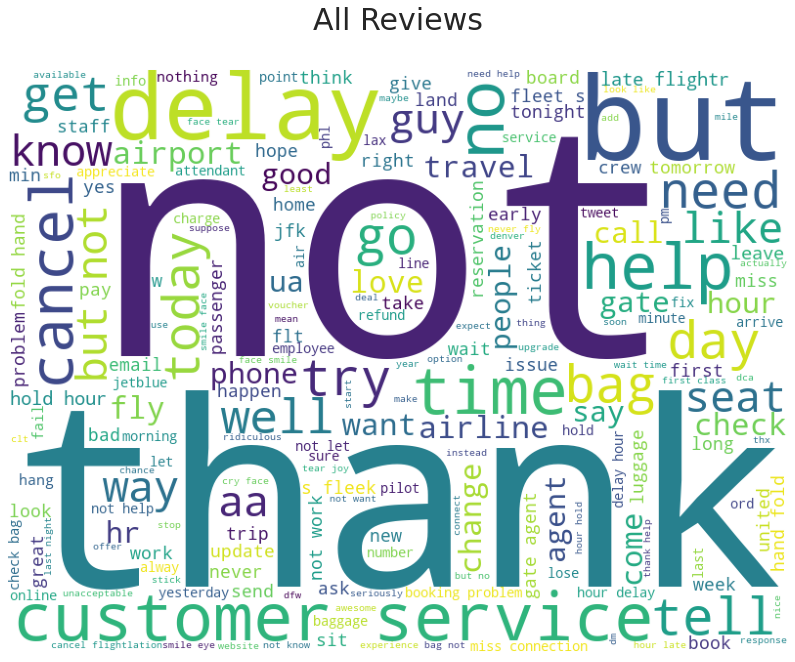

In [49]:
# Wordcloud for all the Pre-processed Reviews

show_wordcloud(corpus = data['Text Pre-processed'], plot_title = 'All Reviews')

- Looking at the Wordcloud for All Reviews, the most frequent words are 'not' and 'thank' which are words directly connected to 'negative' and 'positive' reviews, respectively.

- Next Wordclouds will be showing the split of words (and n-grams) for the 03 categories of 'airline_sentiment': 'negative', 'neutral, and 'positive'.

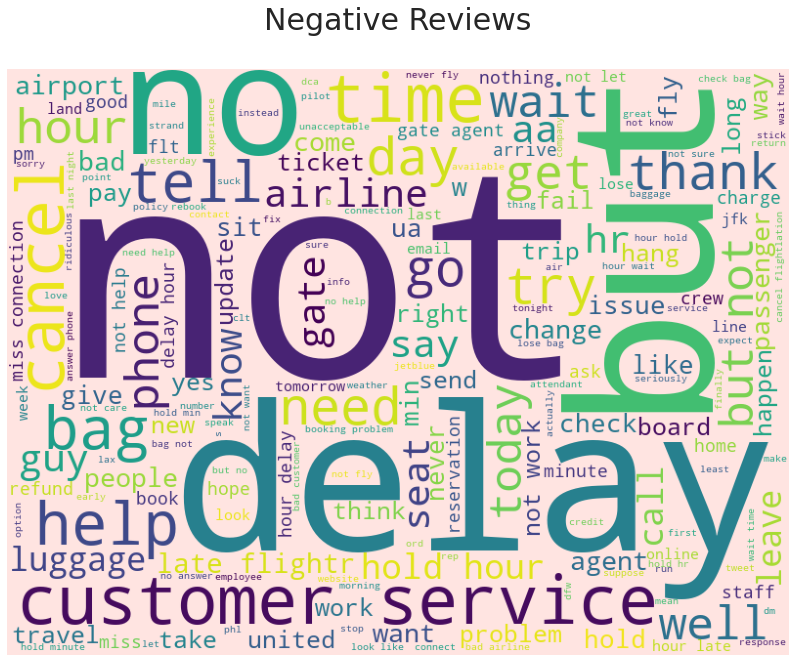

In [50]:
# Wordcloud for the Pre-processed Negative Reviews

show_wordcloud(corpus = data[(data['airline_sentiment'] == "negative")]['Text Pre-processed'], plot_title = "Negative Reviews", color = 'mistyrose')

- Looking at the Wordcloud for Negative Reviews, many negative words and bi-grams such as 'not', 'no', 'delay', 'customer service', 'cancel', 'time' etc can be visualized. An interesting word is 'but' which may also be connected with a negative sentiment in the context of 'except for the fact' or 'on the contrary'.

- As seen at session 1.6 (Exploratory Data Analysis), there were 10 categories for the reasons the Customers expressed their negative sentiments. The most frequent reasons were 'Customer Service Issue', 'Late Flight', 'Cancelled Flight' and 'Lost Luggage'. The Wordcloud above is capturing all of these words, and also other words with similar meaning.

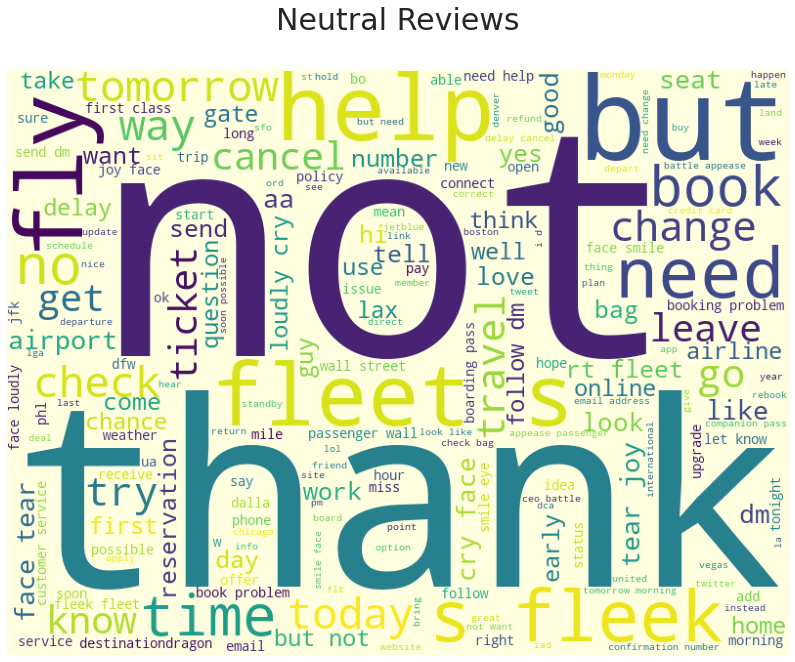

In [51]:
# Wordcloud for the Pre-processed Neutral Reviews

show_wordcloud(corpus = data[(data['airline_sentiment'] == "neutral")]['Text Pre-processed'], plot_title = "Neutral Reviews", color = 'lightyellow')

- Looking at the Wordcloud for Neutral Reviews, the most frequent words are 'not' and 'thank' which are words directly connected to 'negative' and 'positive' reviews, respectively. This Wordcloud is similar to the one with All Reviews. 

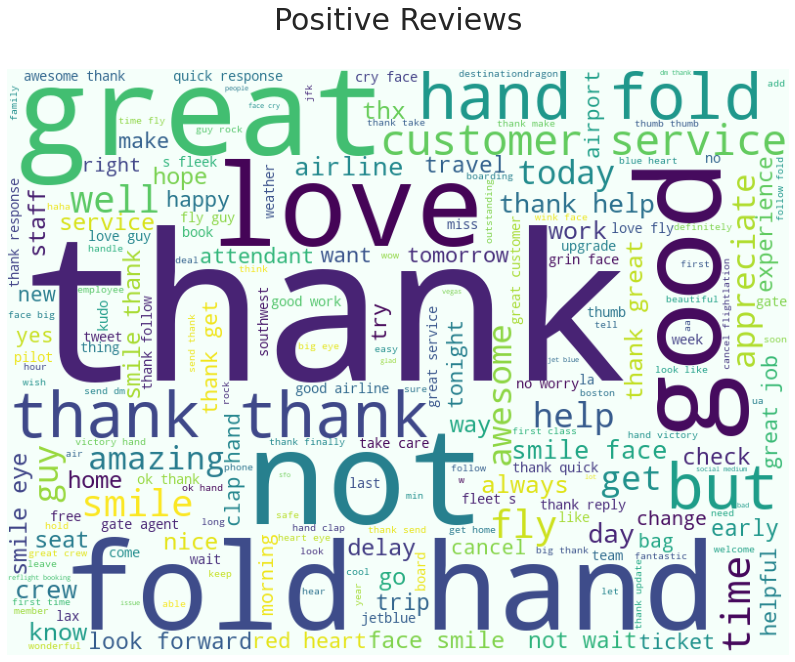

In [52]:
# Wordcloud for the Pre-processed Positive Reviews

show_wordcloud(corpus = data[(data['airline_sentiment'] == "positive")]['Text Pre-processed'], plot_title = "Positive Reviews", color = "mintcream")

- Looking at the Wordcloud for Positive Reviews, many positive words such as 'thank', 'great', 'good', 'appreciate' etc can be visualized. This greatly contrasts the Negative Wordcloud.

### 3.2 - Splitting the Dataset into Train and Test Sets

In [53]:
# Printing the First 05 Rows of the Dataset

data.head()

text  ...                                                   Text Pre-processed
0                                                                                             @VirginAmerica What @dhepburn said.  ...                                                                  say
1                                                        @VirginAmerica plus you've added commercials to the experience... tacky.  ...                                 plus add commercial experience tacky
2                                                         @VirginAmerica I didn't today... Must mean I need to take another trip!  ...                                             not today mean need trip
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse  ...  aggressive blast obnoxious entertainment guest face little recourse
4                                                                         @VirginAmerica and it's a really big bad thing about it  ...                                                        big bad thing

[5 rows x 3 columns]

In [54]:
# Creating a List for the Independent Variable (X) and for the Dependent Variable (y)

X = data['Text Pre-processed']
y = data['airline_sentiment']

In [55]:
# Splitting data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = seed, stratify = y)
X_train.shape, X_test.shape

((10248,), (4392,))

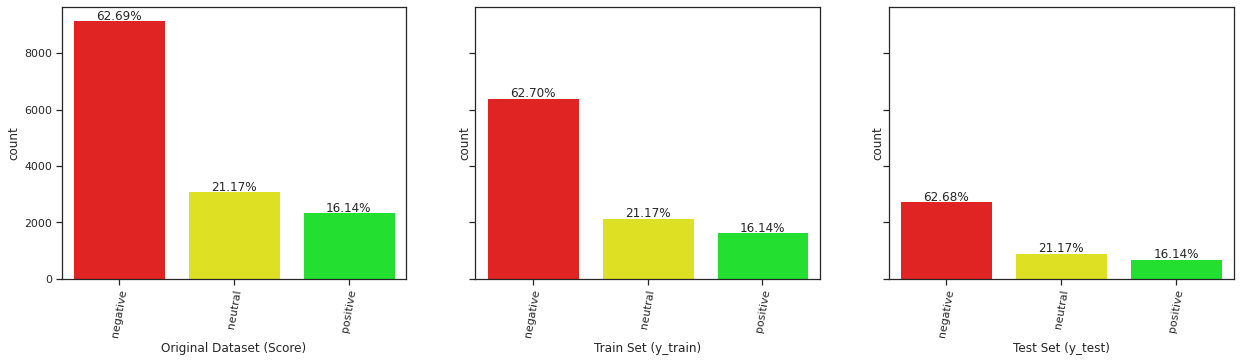

In [56]:
# Countplot with the Percentages for the Different Splits of the Dataset

sns.set({'figure.figsize': (21, 5)})
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook")

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
perc_on_bar(feature = y, color_palette = custom_palette, ax = ax1, label = "Original Dataset (Score)")
perc_on_bar(feature = y_train, color_palette = custom_palette, ax = ax2, label = "Train Set (y_train)")
perc_on_bar(feature = y_test, color_palette = custom_palette, ax = ax3, label = "Test Set (y_test)")

- Train and Test splits were created with 70% and 30% of the data, respectively.

- For the data splitting, a 'stratify = y' argument was utilized to create Train (y_train) and Test (y_test) splits with similar balance to the target variable (as seen on the Countplot above).

***
## 4. Vectorization <a class="anchor" id="444444"></a>

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
- Use CountVectorizer
- Use TfidfVectorizer
- Apply Count Vectorizer, Tf-IDF Vectorizer, on the required text column to make it suitable for fitting the model

- For the initial screening phase, 06 different Classification Algorithms will be used: Decision Trees, Random Forest, Bagging,  Gradient Boosting, Adaptive Boosting and XGBoost.

- A Weighted F1_Score was assigned as the metric of choice for all the Classification models, and it'll also be used for Hyperparameters Tunig upfront. Just in case, Accuracy will be also evaluated for all different models.

- To enable this comparison including several models, a Pipeline approach will be utilized. Both 'CountVectorizer' and 'TfidfVectorizer' transformations will be assigned to the Pipeline for all the models - sessions 4.1 and 4.2, respectively. 

- A 'StratifiedKFold' cross-validator will be used in all model buildings. This Cross-validation object is a variation of KFold that returns stratified folds, or the folds are made by preserving the percentage of samples for each class in the training set. Also, the 'shuffle' argument will be set as 'True' in order to ensure each class' samples is shuffled before splitting into batches. A previously defined common seed ('random_state') will be used for all the 'StratifiedKFold' applications. Also, the number of folds will follow the previously defined number of 03 for all model fittings.

### 4.1 - All Classifiers using Default Parameters and Vectorization with Count Vectorizer

In [57]:
# All Classifiers using Default Parameters and Vectorization with Count Vectorizer

# Start Counting the Running Time
tic = time()

# Empty List to Store All the Models
models_countvec = [] 

# Appending Pipelines for each Model using 'CountVectorizer'
models_countvec.append(("Decision Tree", Pipeline([("transformer", CountVectorizer(max_features = 1000)),
                                                   ("decision_tree", DecisionTreeClassifier(random_state = seed))])))

models_countvec.append(("Random Forest", Pipeline([("transformer", CountVectorizer(max_features = 1000)),
                                                   ("random_forest", RandomForestClassifier(random_state = seed))])))

models_countvec.append(("Bagging Classifier", Pipeline([("transformer", CountVectorizer(max_features = 1000)),
                                                        ("bagging", BaggingClassifier(random_state = seed))])))

models_countvec.append(("Gradient Boosting", Pipeline([("transformer", CountVectorizer(max_features = 1000)),
                                                       ("gradient_boosting", GradientBoostingClassifier(random_state = seed))])))

models_countvec.append(("Adaptive Boosting", Pipeline([("transformer", CountVectorizer(max_features = 1000)),
                                                       ("adaboost", AdaBoostClassifier(random_state = seed))])))

models_countvec.append(("XGBoost", Pipeline([("transformer", CountVectorizer(max_features = 1000)),
                                             ("xgboost", XGBClassifier(eval_metric = "logloss", random_state = seed))])))

# Empty Lists to Store All Models Cross-validated and Test Scores
names = []
results_cv_train_Accuracy_countvec = []
results_test_Accuracy_countvec = []
results_cv_train_F1_Score_countvec = []
results_test_F1_Score_countvec = []

print()
print("Default Models Cross-validated Train Scores and Test Scores - Accuracy and F1-Scores")
print()

# Defining the Cross-validation
kfold = StratifiedKFold(n_splits = n_Folds, random_state = seed, shuffle = True)

# Looping through all Models to get the Mean Cross-validated and Test Scores
for name, model in models_countvec:
    cv_result_Accuracy_countvec = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = "accuracy", cv = kfold)
    cv_result_F1_Score_countvec = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = "f1_weighted", cv = kfold)

    model.fit(X_train, y_train)
    y_pred_test_countvec = model.predict(X_test)
    test_result_Accuracy_countvec = round(accuracy_score(y_test, y_pred_test_countvec), 3)
    test_result_F1_Score_countvec = round(f1_score(y_test, y_pred_test_countvec, average = 'weighted'), 3)

    results_cv_train_Accuracy_countvec.append(cv_result_Accuracy_countvec)
    results_test_Accuracy_countvec.append(test_result_Accuracy_countvec)
    results_cv_train_F1_Score_countvec.append(cv_result_F1_Score_countvec)
    results_test_F1_Score_countvec.append(test_result_F1_Score_countvec)
    names.append(name)
    
    print("{} - Average Train CV Accuracy  : {} | Test Accuracy  : {}".format(name, round(cv_result_Accuracy_countvec.mean(), 3), test_result_Accuracy_countvec))
    print("{} - Average Train CV F1_Score  : {} | Test F1_Score  : {}".format(name, round(cv_result_F1_Score_countvec.mean(), 3), test_result_F1_Score_countvec))
    print()
    
# Creating a comparison dataframe with the metrics for all the models 
comparison_frame_countvec = pd.DataFrame({'Model': names, 'Train_F1_Score' : np.round(np.mean(results_cv_train_F1_Score_countvec, axis = 1), 3),
                                          'Test_F1_Score' : results_test_F1_Score_countvec, 'Test_Accuracy' : results_test_Accuracy_countvec}).set_index('Model')
    
# Time in seconds taken to complete the pre-processing stage
Pre_processing_time_countvec = time() - tic
print("done in {:.3f}s".format(Pre_processing_time_countvec))


Default Models Cross-validated Train Scores and Test Scores - Accuracy and F1-Scores

Decision Tree - Average Train CV Accuracy  : 0.683 | Test Accuracy  : 0.699
Decision Tree - Average Train CV F1_Score  : 0.684 | Test F1_Score  : 0.7

Random Forest - Average Train CV Accuracy  : 0.757 | Test Accuracy  : 0.77
Random Forest - Average Train CV F1_Score  : 0.748 | Test F1_Score  : 0.765

Bagging Classifier - Average Train CV Accuracy  : 0.723 | Test Accuracy  : 0.744
Bagging Classifier - Average Train CV F1_Score  : 0.716 | Test F1_Score  : 0.738

Gradient Boosting - Average Train CV Accuracy  : 0.725 | Test Accuracy  : 0.731
Gradient Boosting - Average Train CV F1_Score  : 0.675 | Test F1_Score  : 0.68

Adaptive Boosting - Average Train CV Accuracy  : 0.714 | Test Accuracy  : 0.738
Adaptive Boosting - Average Train CV F1_Score  : 0.723 | Test F1_Score  : 0.742

XGBoost - Average Train CV Accuracy  : 0.776 | Test Accuracy  : 0.791
XGBoost - Average Train CV F1_Score  : 0.768 | Test F1_S

In [58]:
# Compiling the Training set Cross Validation and Test set results for all Classification models

# Accuracy
results_cv_train_plot_Accuracy_countvec = pd.DataFrame(results_cv_train_Accuracy_countvec, index = names).reset_index().melt(id_vars = ['index'], value_name = 'Accuracy')
results_test_plot_Accuracy_countvec = pd.DataFrame(results_test_Accuracy_countvec, index = names, columns = ['Accuracy']).reset_index()

# F1_Score
results_cv_train_plot_F1_Score_countvec = pd.DataFrame(results_cv_train_F1_Score_countvec, index = names).reset_index().melt(id_vars = ['index'], value_name = 'F1_Score')
results_test_plot_F1_Score_countvec = pd.DataFrame(results_test_F1_Score_countvec, index = names, columns = ['F1_Score']).reset_index()

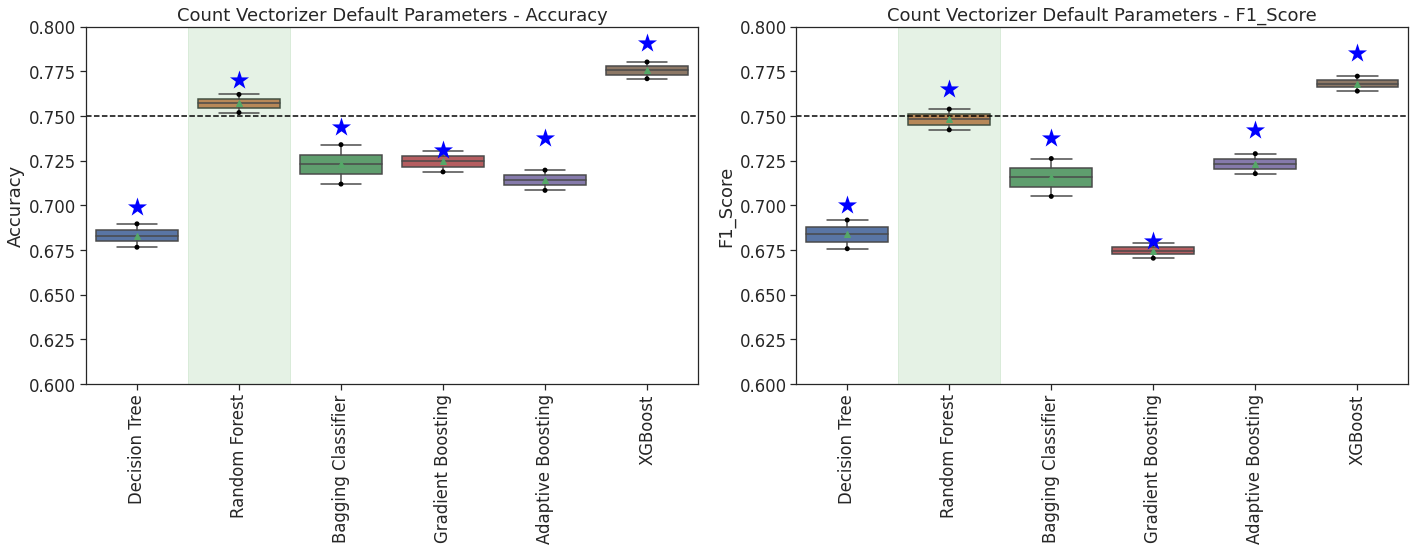

In [59]:
# Box Plots with the Summary for all Classfication models
# Points (black color) and Boxes represent the Cross-validated results on the Training Set
# Blue stars represent the Test Set Prediction for each model

sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale = 1.5)
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

a = sns.boxplot(x = "index", y = "Accuracy", data = results_cv_train_plot_Accuracy_countvec, showmeans = True, ax = axs[0])
sns.stripplot(x = "index", y = "Accuracy", data = results_cv_train_plot_Accuracy_countvec, color = "black", jitter = False, ax = axs[0])
sns.stripplot(x = "index", y = "Accuracy", data = results_test_plot_Accuracy_countvec, size = 20,
              marker = '*', color = "blue", jitter = False, ax = axs[0]).set(title = "Count Vectorizer Default Parameters - Accuracy")
a.axhline(0.75, color = 'black', linestyle = '--')
a.axvspan(0.5, 1.5, color = 'green', alpha = 0.1)
a.set_ylim([0.60, 0.80])
a.set_xticklabels(a.get_xticklabels(), rotation = 90)
a.set(xlabel = None)

a = sns.boxplot(x = "index", y = "F1_Score", data = results_cv_train_plot_F1_Score_countvec, showmeans = True, ax = axs[1])
sns.stripplot(x = "index", y = "F1_Score", data = results_cv_train_plot_F1_Score_countvec, color = "black", jitter = False, ax = axs[1])
sns.stripplot(x = "index", y = "F1_Score", data = results_test_plot_F1_Score_countvec, size = 20,
              marker = '*', color = "blue", jitter = False, ax = axs[1]).set(title = "Count Vectorizer Default Parameters - F1_Score")
a.axhline(0.75, color = 'black', linestyle = '--')
a.axvspan(0.5, 1.5, color = 'green', alpha = 0.1)
a.set_ylim([0.60, 0.80])
a.set_xticklabels(a.get_xticklabels(), rotation = 90)
a.set(xlabel = None)

plt.tight_layout();

- Utilizing the Count Vectorizer transformation, the plots above show that Random Forest and XGBoost represent the best Classification Algorithms, since they both got the highest Train & Test sets Accuracies and F1_Scores. These 02 Classifiers will be taken to the Hyperparameters Tuning stage more upfront.

### 4.2 - All Classifiers using Default Parameters and Vectorization with TF-IDF Vectorizer

In [60]:
# All Classifiers using Default Parameters and Vectorization with TF-IDF Vectorizer

# Start Counting the Running Time
tic = time()

# Empty List to Store All the Models
models_tfidf = [] 

# Appending Pipelines for each Model using 'TfidfVectorizer'
models_tfidf.append(("Decision Tree", Pipeline([("transformer", TfidfVectorizer(smooth_idf = True, norm = 'l2', max_features = 1000)),
                                                ("decision_tree", DecisionTreeClassifier(random_state = seed))])))

models_tfidf.append(("Random Forest", Pipeline([("transformer", TfidfVectorizer(smooth_idf = True, norm = 'l2', max_features = 1000)),
                                                ("random_forest", RandomForestClassifier(random_state = seed))])))

models_tfidf.append(("Bagging Classifier", Pipeline([("transformer", TfidfVectorizer(smooth_idf = True, norm = 'l2', max_features = 1000)),
                                                     ("bagging", BaggingClassifier(random_state = seed))])))

models_tfidf.append(("Gradient Boosting", Pipeline([("transformer", TfidfVectorizer(smooth_idf = True, norm = 'l2', max_features = 1000)),
                                                    ("gradient_boosting", GradientBoostingClassifier(random_state = seed))])))

models_tfidf.append(("Adaptive Boosting", Pipeline([("transformer", TfidfVectorizer(smooth_idf = True, norm = 'l2', max_features = 1000)),
                                                    ("adaboost", AdaBoostClassifier(random_state = seed))])))

models_tfidf.append(("XGBoost", Pipeline([("transformer", TfidfVectorizer(smooth_idf = True, norm = 'l2', max_features = 1000)),
                                          ("xgboost", XGBClassifier(eval_metric = "logloss", random_state = seed))])))

# Empty Lists to Store All Models Cross-validated and Test Scores
names = []
results_cv_train_Accuracy_tfidf = []
results_test_Accuracy_tfidf = []
results_cv_train_F1_Score_tfidf = []
results_test_F1_Score_tfidf = []

print()
print("Default Models Cross-validated Train Scores and Test Scores - Accuracy and F1-Scores")
print()

# Defining the Cross-validation
kfold = StratifiedKFold(n_splits = n_Folds, random_state = seed, shuffle = True)

# Looping through all Models to get the Mean Cross-validated and Test Scores
for name, model in models_tfidf:
    cv_result_Accuracy_tfidf = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = "accuracy", cv = kfold)
    cv_result_F1_Score_tfidf = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = "f1_weighted", cv = kfold)

    model.fit(X_train, y_train)
    y_pred_test_tfidf = model.predict(X_test)
    test_result_Accuracy_tfidf = round(accuracy_score(y_test, y_pred_test_tfidf), 3)
    test_result_F1_Score_tfidf = round(f1_score(y_test, y_pred_test_tfidf, average = 'weighted'), 3)

    results_cv_train_Accuracy_tfidf.append(cv_result_Accuracy_tfidf)
    results_test_Accuracy_tfidf.append(test_result_Accuracy_tfidf)
    results_cv_train_F1_Score_tfidf.append(cv_result_F1_Score_tfidf)
    results_test_F1_Score_tfidf.append(test_result_F1_Score_tfidf)
    names.append(name)
    print("{} - Average Train CV Accuracy  : {} | Test Accuracy  : {}".format(name, round(cv_result_Accuracy_tfidf.mean(), 3), test_result_Accuracy_tfidf))
    print("{} - Average Train CV F1_Score  : {} | Test F1_Score  : {}".format(name, round(cv_result_F1_Score_tfidf.mean(), 3), test_result_F1_Score_tfidf))
    print()
    
# Creating a comparison dataframe with the metrics for all the models 
comparison_frame_tfidf = pd.DataFrame({'Model': names, 'Train_F1_Score' : np.round(np.mean(results_cv_train_F1_Score_tfidf, axis = 1), 3),
                                       'Test_F1_Score' : results_test_F1_Score_tfidf, 'Test_Accuracy' : results_test_Accuracy_tfidf}).set_index('Model')
    
# Time in seconds taken to complete the pre-processing stage
Pre_processing_time_tfidf = time() - tic
print("done in {:.3f}s".format(Pre_processing_time_tfidf))


Default Models Cross-validated Train Scores and Test Scores - Accuracy and F1-Scores

Decision Tree - Average Train CV Accuracy  : 0.705 | Test Accuracy  : 0.723
Decision Tree - Average Train CV F1_Score  : 0.703 | Test F1_Score  : 0.719

Random Forest - Average Train CV Accuracy  : 0.766 | Test Accuracy  : 0.777
Random Forest - Average Train CV F1_Score  : 0.756 | Test F1_Score  : 0.766

Bagging Classifier - Average Train CV Accuracy  : 0.744 | Test Accuracy  : 0.764
Bagging Classifier - Average Train CV F1_Score  : 0.735 | Test F1_Score  : 0.754

Gradient Boosting - Average Train CV Accuracy  : 0.726 | Test Accuracy  : 0.743
Gradient Boosting - Average Train CV F1_Score  : 0.676 | Test F1_Score  : 0.696

Adaptive Boosting - Average Train CV Accuracy  : 0.709 | Test Accuracy  : 0.725
Adaptive Boosting - Average Train CV F1_Score  : 0.685 | Test F1_Score  : 0.732

XGBoost - Average Train CV Accuracy  : 0.768 | Test Accuracy  : 0.781
XGBoost - Average Train CV F1_Score  : 0.761 | Test 

In [61]:
# Compiling the Training set Cross Validation and Test set results for all Classification models

# Accuracy
results_cv_train_plot_Accuracy_tfidf = pd.DataFrame(results_cv_train_Accuracy_tfidf, index = names).reset_index().melt(id_vars = ['index'], value_name = 'Accuracy')
results_test_plot_Accuracy_tfidf = pd.DataFrame(results_test_Accuracy_tfidf, index = names, columns = ['Accuracy']).reset_index()

# F1_Score
results_cv_train_plot_F1_Score_tfidf = pd.DataFrame(results_cv_train_F1_Score_tfidf, index = names).reset_index().melt(id_vars = ['index'], value_name = 'F1_Score')
results_test_plot_F1_Score_tfidf = pd.DataFrame(results_test_F1_Score_tfidf, index = names, columns = ['F1_Score']).reset_index()

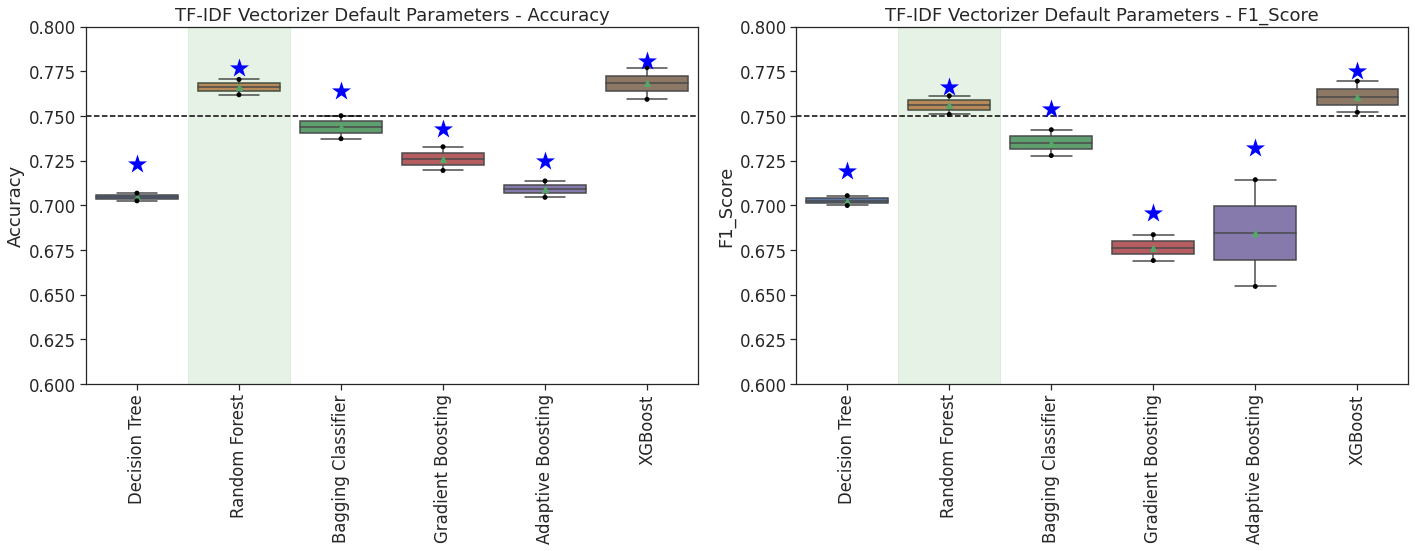

In [62]:
# Box Plots with the Summary for all Classfication models
# Points (black color) and Boxes represent the Cross-validated results on the Training Set
# Blue stars represent the Test Set Prediction for each model

sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale = 1.5)
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

a = sns.boxplot(x = "index", y = "Accuracy", data = results_cv_train_plot_Accuracy_tfidf, showmeans = True, ax = axs[0])
sns.stripplot(x = "index", y = "Accuracy", data = results_cv_train_plot_Accuracy_tfidf, color = "black", jitter = False, ax = axs[0])
sns.stripplot(x = "index", y = "Accuracy", data = results_test_plot_Accuracy_tfidf, size = 20,
              marker = '*', color = "blue", jitter = False, ax = axs[0]).set(title = "TF-IDF Vectorizer Default Parameters - Accuracy")
a.axhline(0.75, color = 'black', linestyle = '--')
a.axvspan(0.5, 1.5, color = 'green', alpha = 0.1)
a.set_ylim([0.60, 0.80])
a.set_xticklabels(a.get_xticklabels(), rotation = 90)
a.set(xlabel = None)

a = sns.boxplot(x = "index", y = "F1_Score", data = results_cv_train_plot_F1_Score_tfidf, showmeans = True, ax = axs[1])
sns.stripplot(x = "index", y = "F1_Score", data = results_cv_train_plot_F1_Score_tfidf, color = "black", jitter = False, ax = axs[1])
sns.stripplot(x = "index", y = "F1_Score", data = results_test_plot_F1_Score_tfidf, size = 20,
              marker = '*', color = "blue", jitter = False, ax = axs[1]).set(title = "TF-IDF Vectorizer Default Parameters - F1_Score")
a.axhline(0.75, color = 'black', linestyle = '--')
a.axvspan(0.5, 1.5, color = 'green', alpha = 0.1)
a.set_ylim([0.60, 0.80])
a.set_xticklabels(a.get_xticklabels(), rotation = 90)
a.set(xlabel = None)

plt.tight_layout();

- Utilizing the TF_IDF Vectorizer transformation, the plots above show that Random Forest and XGBoost represent the best Classification Algorithms, since they both got the highest Train & Test sets Accuracies and F1_Scores. These 02 Classifiers will be taken to the Hyperparameters Tuning stage more upfront.

- The results by having the TF_IDF Vectorizer transformation are very similar to the results got with Count Vectorizer. 

***
## 5. Fit and Evaluate the Model using both Types of Vectorization <a class="anchor" id="555555"></a>

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:blue;">
    
- Fit the model using vectorized column - Evaluate the model using the confusion matrix

- This session will be dealing with model fittings including both types of vectorization (Count Vectorizer and TF-IDF Vectorizer). Also, Random Forest and XGBoost will be further explored using Hyperparameters Tuning.

### 5.1 - Hyperparameters Tuning for Random Forest with Count Vectorizer

In [ ]:
# Hyperparameters Tuning for Random Forest with Count Vectorizer

# Start Counting the Running Time
tic_rf_countvec = time()

# Creating a Model Pipeline with the 'CountVectorizer' transformation and Random Forest Classifier from Scikit-Learn
pipeline_tuning_rf_countvec = Pipeline([("transformer",  CountVectorizer(max_features = 1000, ngram_range = (1, 1))),
                                        ("random_forest", RandomForestClassifier(random_state = seed, n_jobs = -1))])

# Dictionary with all Hyperparameters to be included in the Ramdomized Search process
parameters = {'transformer__max_features' : np.arange(1000, 16000, 1000),
              'transformer__ngram_range' : [(1, 1), (1, 2), (1, 3)],
              'random_forest__max_features' : ['auto', 'sqrt', 'log2'],
              'random_forest__min_samples_split' : sp_randint(2, 6),
              'random_forest__min_samples_leaf' : sp_randint(1, 6),
              'random_forest__n_estimators' : np.arange(100, 1050, 50),
              'random_forest__criterion' : ['gini', 'entropy'],
              'random_forest__class_weight' : [None, 'balanced', 'balanced_subsample']}

# Scoring metric definition
# scorer = 'f1_weighted'
scorer = 'accuracy'

# Calling RandomizedSearchCV
grid_cv_rf_countvec = RandomizedSearchCV(estimator = pipeline_tuning_rf_countvec, param_distributions = parameters, scoring = scorer,
                                         n_iter = random_search_samples, cv = StratifiedKFold(n_splits = n_Folds, shuffle = True, random_state = seed),
                                         random_state = seed, verbose = 20)

# Fitting the Models
grid_result_rf_countvec = grid_cv_rf_countvec.fit(X_train, y_train)

# Setting the best combination of hypeparameters from the Randomized Search Cross-validation process
model_tuning_result_rf_countvec = grid_cv_rf_countvec.best_estimator_

# Predicting 'y_test' using the Classification model with the best combination of hypeparameters
y_pred_test_tuning_rf_countvec = model_tuning_result_rf_countvec.predict(X_test)

# Test set metrics for the best selected Classification model
test_score_tuning_rf_countvec = round(f1_score(y_test, y_pred_test_tuning_rf_countvec, average = 'weighted'), 3)
test_accuracy_rf_countvec = round(accuracy_score(y_test, y_pred_test_tuning_rf_countvec), 3)

# Train set Cross Validation prediction average, prediction standard deviation and parameters for the best selected model
CV_mean_rf_countvec = grid_result_rf_countvec.cv_results_['mean_test_score']
CV_std_dev_rf_countvec = grid_result_rf_countvec.cv_results_['std_test_score']
params_rf_countvec = grid_result_rf_countvec.cv_results_['params']

print()
for mean_rf_countvec, stdev_rf_countvec, param_rf_countvec in zip(CV_mean_rf_countvec, CV_std_dev_rf_countvec, params_rf_countvec):
    print("%f (%f) with: %r" % (mean_rf_countvec, stdev_rf_countvec, param_rf_countvec))

print()
print("Best Parameters:{} \nTrain F1_Score CV Score: {} \nTest F1_Score: {} | Test Accuracy: {}".format(grid_cv_rf_countvec.best_params_,
                                                                                                        round(grid_cv_rf_countvec.best_score_, 3),
                                                                                                        test_score_tuning_rf_countvec, test_accuracy_rf_countvec))
print()

# Time in seconds taken to complete the hyperparameters tuning process
model_time_rf_countvec = time() - tic_rf_countvec
print("done in {:.3f}s".format(model_time_rf_countvec))

In [64]:
# Creating a dataframe with all the Ramdomized Search iterations and sorting it by rank test score
# 1st model in the dataframe is ranked #1 or the best Classification model for the defined scoring metric (F1_Score)

scores_NN_pipeline_tuning_rf_countvec = pd.DataFrame(grid_result_rf_countvec.cv_results_)
scores_NN_pipeline_tuning_rf_countvec = scores_NN_pipeline_tuning_rf_countvec.sort_values(by = ['rank_test_score']).reset_index(drop = 'index')
scores_NN_pipeline_tuning_rf_countvec.T

0    ...                                                                                                                                                                                                                                                                                                              299
mean_fit_time                                                                                                                                                                                                                                                                                                                                             13.6785  ...                                                                                                                                                                                                                                                                                                          1.33881
std_fit_time                                                                                                                                                                                                                                                                                                                                            0.0021044  ...                                                                                                                                                                                                                                                                                                       0.00459898
mean_score_time                                                                                                                                                                                                                                                                                                                                           1.89434  ...                                                                                                                                                                                                                                                                                                         0.495146
std_score_time                                                                                                                                                                                                                                                                                                                                         0.00118446  ...                                                                                                                                                                                                                                                                                                      4.55379e-05
param_random_forest__class_weight                                                                                                                                                                                                                                                                                                              balanced_subsample  ...                                                                                                                                                                                                                                                                                                         balanced
param_random_forest__criterion                                                                                                                                                                                                                                                                                                                               gini  ...        

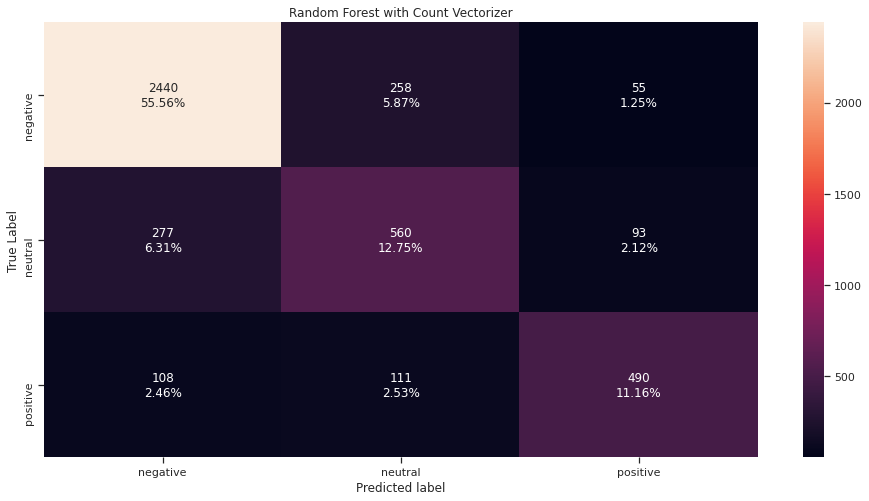


              precision    recall  f1-score   support

    negative     0.8637    0.8863    0.8749      2753
     neutral     0.6028    0.6022    0.6025       930
    positive     0.7680    0.6911    0.7275       709

    accuracy                         0.7946      4392
   macro avg     0.7448    0.7265    0.7350      4392
weighted avg     0.7930    0.7946    0.7934      4392



In [65]:
# Creating a Confusion Matrix for the Tuned Classification Model (Random Forest with Count Vectorizer)

make_confusion_matrix(model = model_tuning_result_rf_countvec, X_test = X_test, y_test = y_test, plot_title = 'Random Forest with Count Vectorizer', 
                      summary_metrics = True, library = 'sklearn', axis_labels = ('negative', 'neutral', 'positive'))

In [66]:
# Building a Dataframe with the DTM for the Best Selected Model thru Randomized Search Cross-validation
# The Resulting Dataframe will be utilized to Analyze the Features Importance (following step)

# Retrieving the 'CountVectorizer' transformation from the model Pipeline and applying a '.fit_transform' on X_train
response_rf_countvec = model_tuning_result_rf_countvec['transformer'].fit_transform(X_train)

# Checking the shape for the DTM
print("The DTM shape is", response_rf_countvec.toarray().shape)

# Creating a dataframe for the DTM including the feature names
X_train_ = pd.DataFrame(response_rf_countvec.toarray(), columns = model_tuning_result_rf_countvec['transformer'].get_feature_names())
X_train_.head()

The DTM shape is (10248, 9000)


aa  aa agent  aa customer  aa delay  ...  zero  zone  zurich  zz
0   0         0            0         0  ...     0     0       0   0
1   0         0            0         0  ...     0     0       0   0
2   0         0            0         0  ...     0     0       0   0
3   0         0            0         0  ...     0     0       0   0
4   0         0            0         0  ...     0     0       0   0

[5 rows x 9000 columns]

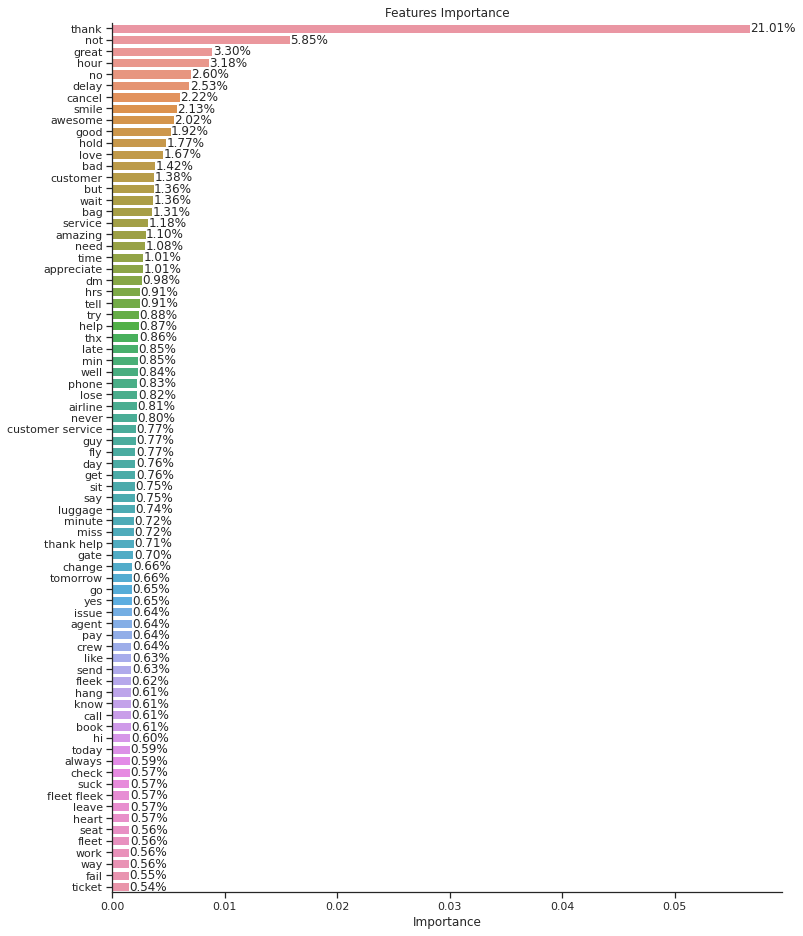

In [67]:
# Features Importance for the Tuned Classification Model (Random Forest with Count Vectorizer)

features_importance(model = model_tuning_result_rf_countvec.steps[1][1], number_features = 75)

In [68]:
# Obtaining the Relative Importance for each Feature
# This information will be used to create a Wordcloud with the respective weights linked to the Features Importance 

fi_wc_rf_countvec = pd.DataFrame(model_tuning_result_rf_countvec.steps[1][1].feature_importances_, columns = ["Importance"],
                                 index = X_train_.columns).reset_index().sort_values(by = 'Importance', ascending = False)
fi_wc_rf_countvec = fi_wc_rf_countvec.iloc[0 : 200]
fi_wc_rf_countvec.head(5)

index  Importance
7632  thank    0.056685
5058    not    0.015781
3072  great    0.008915
3410   hour    0.008586
4868     no    0.007005

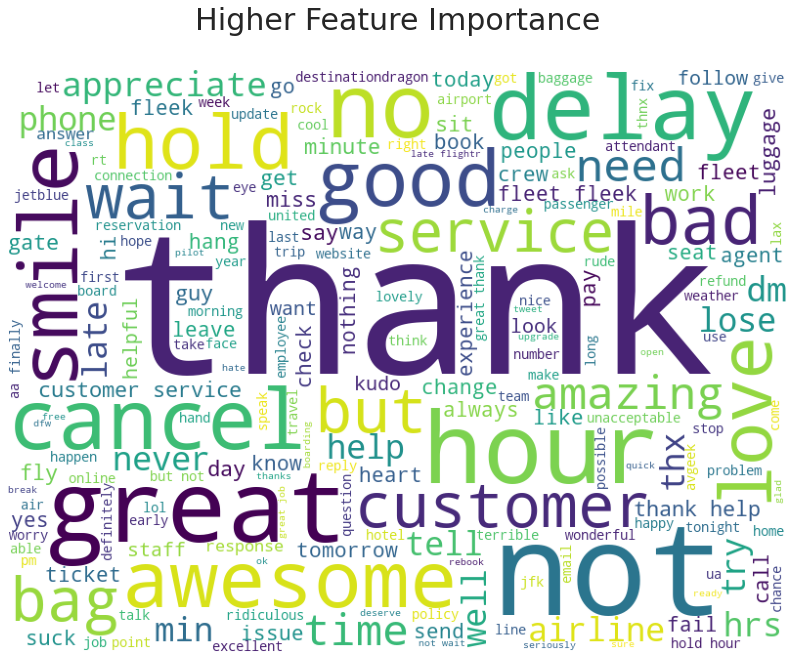

In [69]:
# Creating a Wordcloud based on Frequencies (Variable Importance) using the def Function 'show_wordcloud_with_frequency()'

# Variable Importance Dictionary
dictionary_wc_rf_countvec = fi_wc_rf_countvec.set_index('index').to_dict()['Importance']

# Plotting the Wordcloude based on Frequencies (Variable Importance)
show_wordcloud_with_frequency(dictionary = dictionary_wc_rf_countvec, plot_title = "Higher Feature Importance")

- The Wordcloud above is reflecting the Features Importance for the Tuned Random Forest Classifier with Count Vectorizer transformation. The information visualized on this Wordcloud is the same as the previous plot for Features Importance. The bigger the words on this Wordcloud the more important they are for the Sentiment Analysis Classification model.

### 5.2 - Hyperparameters Tuning for XGBoost with Count Vectorizer

In [ ]:
# Hyperparameters Tuning for XGBoost with Count Vectorizer

# Start Counting the Running Time
tic_xgboost_countvec = time()

# Creating a Model Pipeline with the 'CountVectorizer' transformation and XGBClassifier
pipeline_tuning_xgboost_countvec = Pipeline([("transformer", CountVectorizer(max_features = 1000, ngram_range = (1, 1))),
                                                ("xgboost", XGBClassifier(eval_metric = "logloss", random_state = seed, n_jobs = -1))])

# Dictionary with all Hyperparameters to be included in the Ramdomized Search process
parameters = {'transformer__max_features' : np.arange(1000, 16000, 1000),
              'transformer__ngram_range' : [(1, 1), (1, 2), (1, 3)],
              'xgboost__n_estimators' : np.arange(100, 1050, 50),
              'xgboost__subsample' : np.arange(0.5, 1.01, 0.1),
              'xgboost__learning_rate' : np.arange(0.05, 1.05, 0.05),
              'xgboost__gamma' : sp_randint(0, 6),
              'xgboost__max_depth' : sp_randint(3, 11)}

# Scoring metric definition
# scorer = 'f1_weighted'
scorer = 'accuracy'

# Calling RandomizedSearchCV
grid_cv_xgboost_countvec = RandomizedSearchCV(estimator = pipeline_tuning_xgboost_countvec, param_distributions = parameters, scoring = scorer,
                                              n_iter = random_search_samples, cv = StratifiedKFold(n_splits = n_Folds, shuffle = True, random_state = seed),
                                              random_state = seed, verbose = 20)

# Fitting the Models
grid_result_xgboost_countvec = grid_cv_xgboost_countvec.fit(X_train, y_train)

# Setting the best combination of hypeparameters from the Randomized Search Cross-validation process
model_tuning_result_xgboost_countvec = grid_cv_xgboost_countvec.best_estimator_

# Predicting 'y_test' using the Classification model with the best combination of hypeparameters
y_pred_test_tuning_xgboost_countvec = model_tuning_result_xgboost_countvec.predict(X_test)

# Test set metrics for the best selected Classification model
test_score_tuning_xgboost_countvec = round(f1_score(y_test, y_pred_test_tuning_xgboost_countvec, average = 'weighted'), 3)
test_accuracy_xgboost_countvec = round(accuracy_score(y_test, y_pred_test_tuning_xgboost_countvec), 3)

# Train set Cross Validation prediction average, prediction standard deviation and parameters for the best selected model
CV_mean_xgboost_countvec = grid_result_xgboost_countvec.cv_results_['mean_test_score']
CV_std_dev_xgboost_countvec = grid_result_xgboost_countvec.cv_results_['std_test_score']
params_xgboost_countvec = grid_result_xgboost_countvec.cv_results_['params']

print()
for mean_xgboost_countvec, stdev_xgboost_countvec, param_xgboost_countvec in zip(CV_mean_xgboost_countvec, CV_std_dev_xgboost_countvec, params_xgboost_countvec):
    print("%f (%f) with: %r" % (mean_xgboost_countvec, stdev_xgboost_countvec, param_xgboost_countvec))

print()
print("Best Parameters:{} \nTrain F1_Score CV Score: {} \nTest F1_Score: {} | Test Accuracy: {}".format(grid_cv_xgboost_countvec.best_params_,
                                                                                                        round(grid_cv_xgboost_countvec.best_score_, 3),
                                                                                                        test_score_tuning_xgboost_countvec,
                                                                                                        test_accuracy_xgboost_countvec))
print()

# Time in seconds taken to complete the hyperparameters tuning process
model_time_xgboost_countvec = time() - tic_xgboost_countvec
print("done in {:.3f}s".format(model_time_xgboost_countvec))

In [71]:
# Creating a dataframe with all the Ramdomized Search iterations and sorting it by rank test score
# 1st model in the dataframe is ranked #1 or the best Classification model for the defined scoring metric (F1_Score)

scores_NN_pipeline_tuning_xgboost_countvec = pd.DataFrame(grid_result_xgboost_countvec.cv_results_)
scores_NN_pipeline_tuning_xgboost_countvec = scores_NN_pipeline_tuning_xgboost_countvec.sort_values(by = ['rank_test_score']).reset_index(drop = 'index')
scores_NN_pipeline_tuning_xgboost_countvec.T

0    ...                                                                                                                                                                                                                             299
mean_fit_time                                                                                                                                                                                                                                         7.53539  ...                                                                                                                                                                                                                         2.52027
std_fit_time                                                                                                                                                                                                                                        0.0185212  ...                                                                                                                                                                                                                       0.0248029
mean_score_time                                                                                                                                                                                                                                      0.184637  ...                                                                                                                                                                                                                        0.119906
std_score_time                                                                                                                                                                                                                                    0.000762939  ...                                                                                                                                                                                                                     0.000189185
param_transformer__max_features                                                                                                                                                                                                                          8000  ...                                                                                                                                                                                                                           12000
param_transformer__ngram_range                                                                                                                                                                                                                         (1, 2)  ...                                                                                                                                                                                                                          (1, 2)
param_xgboost__gamma                                                                                                                                                                                                                                        0  ...                                                                                                                                                                                                                               5
param_xgboost__learning_rate                                                                                                                                                                                                                              0.4  ...                                                                                                                                

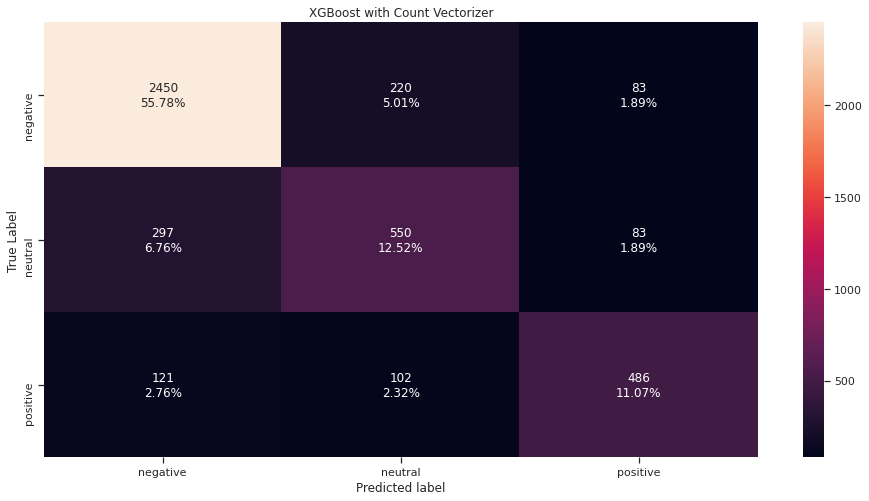


              precision    recall  f1-score   support

    negative     0.8543    0.8899    0.8717      2753
     neutral     0.6307    0.5914    0.6104       930
    positive     0.7454    0.6855    0.7142       709

    accuracy                         0.7937      4392
   macro avg     0.7435    0.7223    0.7321      4392
weighted avg     0.7894    0.7937    0.7910      4392



In [72]:
# Creating a Confusion Matrix for the Tuned Classification Model (XGBoost with Count Vectorizer)

make_confusion_matrix(model = model_tuning_result_xgboost_countvec, X_test = X_test, y_test = y_test, plot_title = 'XGBoost with Count Vectorizer',
                      summary_metrics = True, library = 'sklearn', axis_labels = ('negative', 'neutral', 'positive'))

In [73]:
# Building a Dataframe with the DTM for the Best Selected Model thru Randomized Search Cross-validation
# The Resulting Dataframe will be utilized to Analyze the Features Importance (following step)

# Retrieving the 'CountVectorizer' transformation from the model Pipeline and applying a '.fit_transform' on X_train
response_xgboost_countvec = model_tuning_result_xgboost_countvec['transformer'].fit_transform(X_train)

# Checking the shape for the DTM
print("The DTM shape is", response_xgboost_countvec.toarray().shape)

# Creating a dataframe for the DTM including the feature names
X_train_ = pd.DataFrame(response_xgboost_countvec.toarray(), columns = model_tuning_result_xgboost_countvec['transformer'].get_feature_names())
X_train_.head()

The DTM shape is (10248, 8000)


aa  aa agent  aa customer  aa delay  ...  yyz terminal  zero  zone  zurich
0   0         0            0         0  ...             0     0     0       0
1   0         0            0         0  ...             0     0     0       0
2   0         0            0         0  ...             0     0     0       0
3   0         0            0         0  ...             0     0     0       0
4   0         0            0         0  ...             0     0     0       0

[5 rows x 8000 columns]

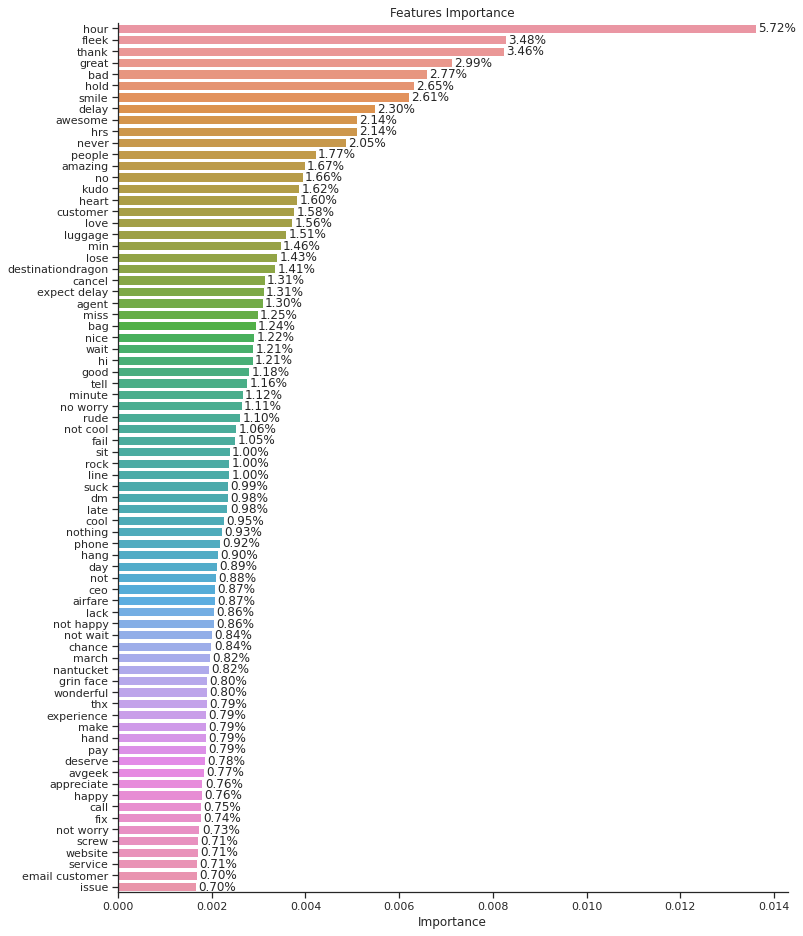

In [74]:
# Features Importance for the Tuned Classification Model (XGBoost with Count Vectorizer)

features_importance(model = model_tuning_result_xgboost_countvec.steps[1][1], number_features = 75)

In [75]:
# Obtaining the Relative Importance for each Feature
# This information will be used to create a Wordcloud with the respective weights linked to the Features Importance 

fi_wc_xgboost_countvec = pd.DataFrame(model_tuning_result_xgboost_countvec.steps[1][1].feature_importances_, columns = ["Importance"],
                                      index = X_train_.columns).reset_index().sort_values(by = 'Importance', ascending = False)
fi_wc_xgboost_countvec = fi_wc_xgboost_countvec.iloc[0 : 200]
fi_wc_xgboost_countvec.head(5)

index  Importance
3347   hour    0.013609
2425  fleek    0.008276
6778  thank    0.008239
3072  great    0.007118
354     bad    0.006596

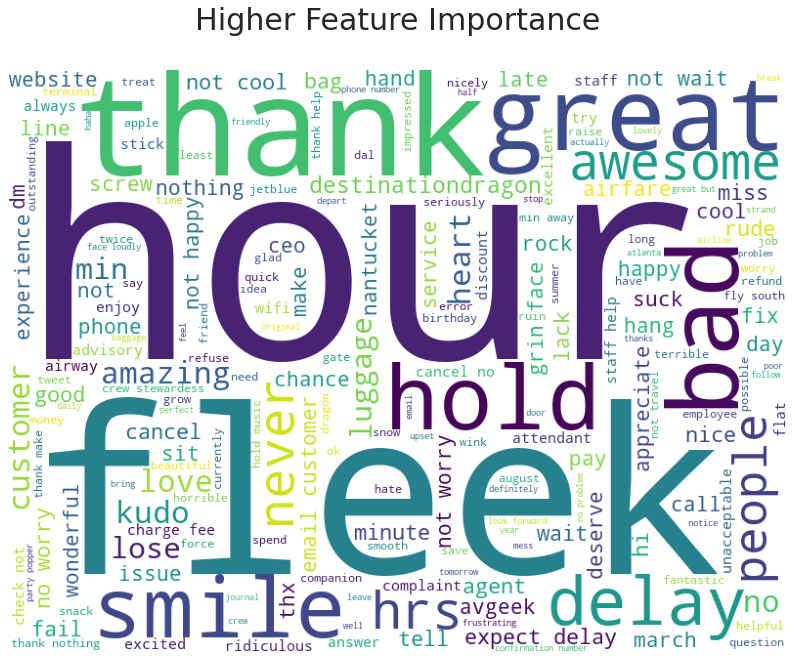

In [76]:
# Creating a Wordcloud based on Frequencies (Variable Importance) using the def Function 'show_wordcloud_with_frequency()'

# Variable Importance Dictionary
dictionary_wc_xgboost_countvec = fi_wc_xgboost_countvec.set_index('index').to_dict()['Importance']

# Plotting the Wordcloude based on Frequencies (Variable Importance)
show_wordcloud_with_frequency(dictionary = dictionary_wc_xgboost_countvec, plot_title = "Higher Feature Importance")

- The Wordcloud above is reflecting the Features Importance for the Tuned XGBoost Classifier with Count Vectorizer transformation. The information visualized on this Wordcloud is the same as the previous plot for Features Importance. The bigger the words on this Wordcloud the more important they are for the Sentiment Analysis Classification model.

### 5.3 - Hyperparameters Tuning for Random Forest with TF-IDF Vectorizer

In [ ]:
# Hyperparameters Tuning for Random Forest with TF-IDF Vectorizer

# Start Counting the Running Time
tic_rf_tfidf = time()

# Creating a Model Pipeline with the 'TfidfVectorizer' transformation and Random Forest Classifier from Scikit-Learn
pipeline_tuning_rf_tfidf = Pipeline([("transformer", TfidfVectorizer(smooth_idf = True, norm = 'l2', max_features = 1000, ngram_range = (1, 1))),
                                     ("random_forest", RandomForestClassifier(random_state = seed, n_jobs = -1))])

# Dictionary with all Hyperparameters to be included in the Ramdomized Search process
parameters = {'transformer__max_features' : np.arange(1000, 16000, 1000),
              'transformer__smooth_idf' : [False, True],
              'transformer__norm' : ['l1', 'l2'],
              'transformer__ngram_range' : [(1, 1), (1, 2), (1, 3)],
              'random_forest__max_features' : ['auto', 'sqrt', 'log2'],
              'random_forest__min_samples_split' : sp_randint(2, 6),
              'random_forest__min_samples_leaf' : sp_randint(1, 6),
              'random_forest__n_estimators' : np.arange(100, 1050, 50),
              'random_forest__criterion' : ['gini', 'entropy'],
              'random_forest__class_weight' : [None, 'balanced', 'balanced_subsample']}

# Scoring metric definition
# scorer = 'f1_weighted'
scorer = 'accuracy'

# Calling RandomizedSearchCV
grid_cv_rf_tfidf = RandomizedSearchCV(estimator = pipeline_tuning_rf_tfidf, param_distributions = parameters, scoring = scorer, n_iter = random_search_samples,
                                      cv = StratifiedKFold(n_splits = n_Folds, shuffle = True, random_state = seed) , random_state = seed, verbose = 20)

# Fitting the Models
grid_result_rf_tfidf = grid_cv_rf_tfidf.fit(X_train, y_train)

# Setting the best combination of hypeparameters from the Randomized Search Cross-validation process
model_tuning_result_rf_tfidf = grid_cv_rf_tfidf.best_estimator_

# Predicting 'y_test' using the Classification model with the best combination of hypeparameters
y_pred_test_tuning_rf_tfidf = model_tuning_result_rf_tfidf.predict(X_test)

# Test set metrics for the best selected Classification model
test_score_tuning_rf_tfidf = round(f1_score(y_test, y_pred_test_tuning_rf_tfidf, average = 'weighted'), 3)
test_accuracy_rf_tfidf = round(accuracy_score(y_test, y_pred_test_tuning_rf_tfidf), 3)

# Train set Cross Validation prediction average, prediction standard deviation and parameters for the best selected model
CV_mean_rf_tfidf = grid_result_rf_tfidf.cv_results_['mean_test_score']
CV_std_dev_rf_tfidf = grid_result_rf_tfidf.cv_results_['std_test_score']
params_rf_tfidf = grid_result_rf_tfidf.cv_results_['params']

print()
for mean_rf_tfidf, stdev_rf_tfidf, param_rf_tfidf in zip(CV_mean_rf_tfidf, CV_std_dev_rf_tfidf, params_rf_tfidf):
    print("%f (%f) with: %r" % (mean_rf_tfidf, stdev_rf_tfidf, param_rf_tfidf))

print()
print("Best Parameters:{} \nTrain F1_Score CV Score: {} \nTest F1_Score: {} | Test Accuracy: {}".format(grid_cv_rf_tfidf.best_params_,
                                                                                                        round(grid_cv_rf_tfidf.best_score_, 3),
                                                                                                        test_score_tuning_rf_tfidf, test_accuracy_rf_tfidf))
print()

# Time in seconds taken to complete the hyperparameters tuning process
model_time_rf_tfidf = time() - tic_rf_tfidf
print("done in {:.3f}s".format(model_time_rf_tfidf))

In [78]:
# Creating a dataframe with all the Ramdomized Search iterations and sorting it by rank test score
# 1st model in the dataframe is ranked #1 or the best Classification model for the defined scoring metric (F1_Score)

scores_NN_pipeline_tuning_rf_tfidf = pd.DataFrame(grid_result_rf_tfidf.cv_results_)
scores_NN_pipeline_tuning_rf_tfidf = scores_NN_pipeline_tuning_rf_tfidf.sort_values(by = ['rank_test_score']).reset_index(drop = 'index')
scores_NN_pipeline_tuning_rf_tfidf.T

0    ...                                                                                                                                                                                                                                                                                                                                                                              299
mean_fit_time                                                                                                                                                                                                                                                                                                                                                                                                         6.57727  ...                                                                                                                                                                                                                                                                                                                                                                         0.589601
std_fit_time                                                                                                                                                                                                                                                                                                                                                                                                          0.07767  ...                                                                                                                                                                                                                                                                                                                                                                        0.0022769
mean_score_time                                                                                                                                                                                                                                                                                                                                                                                                       0.95809  ...                                                                                                                                                                                                                                                                                                                                                                           0.1959
std_score_time                                                                                                                                                                                                                                                                                                                                                                                                    0.000497818  ...                                                                                                                                                                                                                                                                                                                                                                      0.000303149
param_random_forest__class_weight                                                                                                                                                                                                                                                                                                                                                                          balanced_subsample  ...                                                    

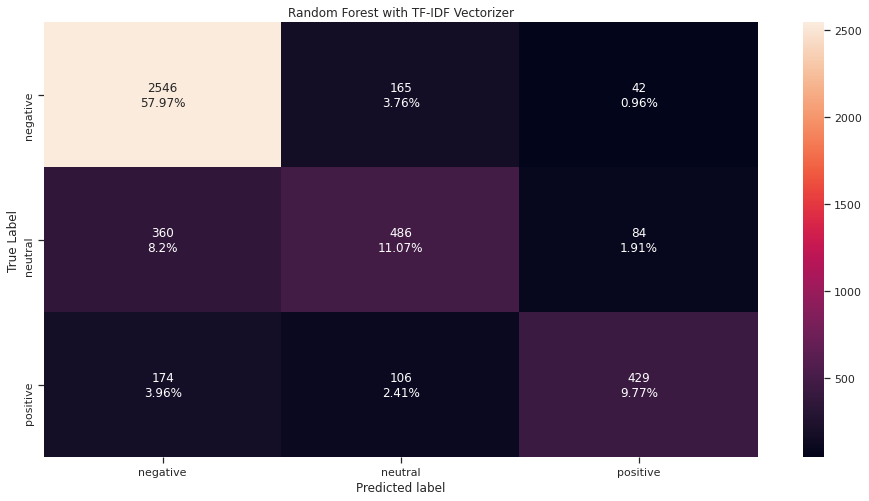


              precision    recall  f1-score   support

    negative     0.8266    0.9248    0.8730      2753
     neutral     0.6420    0.5226    0.5762       930
    positive     0.7730    0.6051    0.6788       709

    accuracy                         0.7880      4392
   macro avg     0.7472    0.6842    0.7093      4392
weighted avg     0.7789    0.7880    0.7788      4392



In [79]:
# Creating a Confusion Matrix for the Tuned Classification Model (Random Forest with TF-IDF Vectorizer)

make_confusion_matrix(model = model_tuning_result_rf_tfidf, X_test = X_test, y_test = y_test, plot_title = 'Random Forest with TF-IDF Vectorizer', 
                      summary_metrics = True, library = 'sklearn', axis_labels = ('negative', 'neutral', 'positive'))

In [80]:
# Building a Dataframe with the DTM for the Best Selected Model thru Randomized Search Cross-validation
# The Resulting Dataframe will be utilized to Analyze the Features Importance (following step)

# Retrieving the 'TfidfVectorizer' transformation from the model Pipeline and applying a '.fit_transform' on X_train
response_rf_tfidf = model_tuning_result_rf_tfidf['transformer'].fit_transform(X_train)

# Checking the shape for the DTM
print("The DTM shape is", response_rf_tfidf.toarray().shape)

# Creating a dataframe for the DTM including the feature names
X_train_ = pd.DataFrame(response_rf_tfidf.toarray(), columns = model_tuning_result_rf_tfidf['transformer'].get_feature_names())
X_train_.head()

The DTM shape is (10248, 7641)


aa  aaaand  aaadvantage  aaalwayslate  ...  zrh  zuke  zurich   zz
0  0.0     0.0          0.0           0.0  ...  0.0   0.0     0.0  0.0
1  0.0     0.0          0.0           0.0  ...  0.0   0.0     0.0  0.0
2  0.0     0.0          0.0           0.0  ...  0.0   0.0     0.0  0.0
3  0.0     0.0          0.0           0.0  ...  0.0   0.0     0.0  0.0
4  0.0     0.0          0.0           0.0  ...  0.0   0.0     0.0  0.0

[5 rows x 7641 columns]

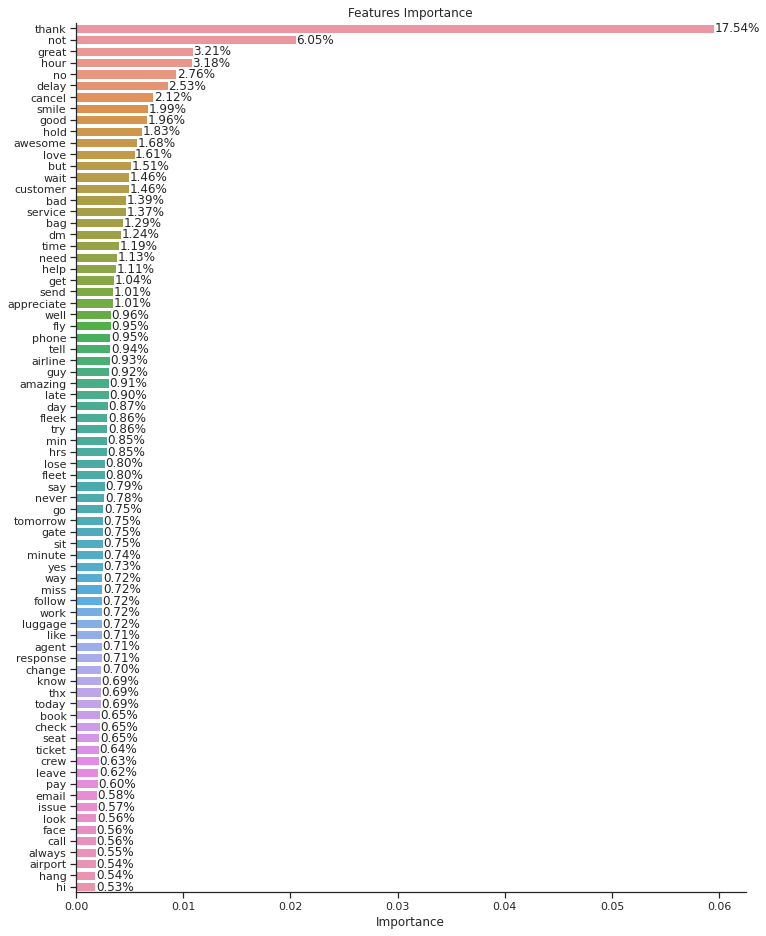

In [81]:
# Features Importance for the Tuned Classification Model (Random Forest with TF-IDF Vectorizer)

features_importance(model = model_tuning_result_rf_tfidf.steps[1][1], number_features = 75)

In [82]:
# Obtaining the Relative Importance for each Feature
# This information will be used to create a Wordcloud with the respective weights linked to the Features Importance 

fi_wc_rf_tfidf = pd.DataFrame(model_tuning_result_rf_tfidf.steps[1][1].feature_importances_, columns = ["Importance"],
                              index = X_train_.columns).reset_index().sort_values(by = 'Importance', ascending = False)
fi_wc_rf_tfidf = fi_wc_rf_tfidf.iloc[0 : 200]
fi_wc_rf_tfidf.head(5)

index  Importance
6655  thank    0.059496
4579    not    0.020505
2864  great    0.010895
3154   hour    0.010790
4518     no    0.009368

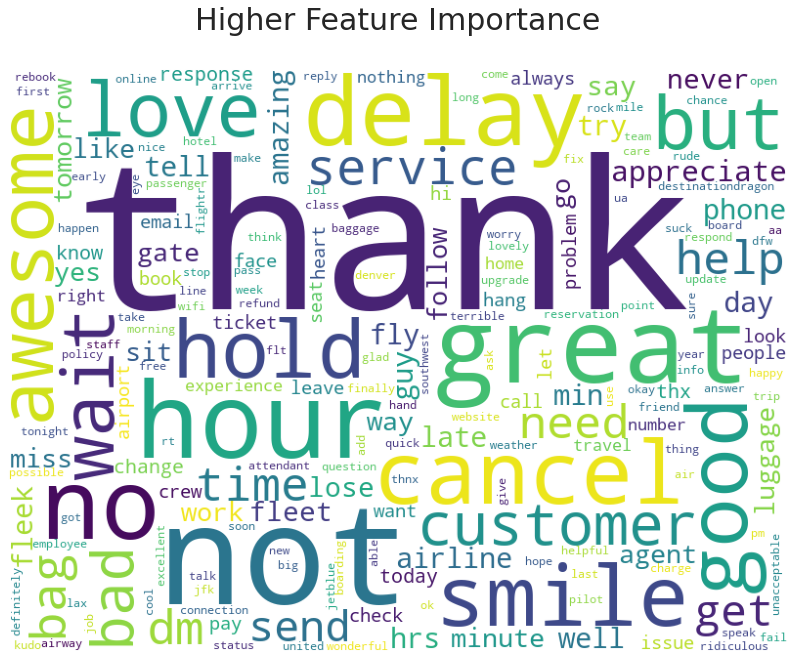

In [83]:
# Creating a Wordcloud based on Frequencies (Variable Importance) using the def Function 'show_wordcloud_with_frequency()'

# Variable Importance Dictionary
dictionary_wc_rf_tfidf = fi_wc_rf_tfidf.set_index('index').to_dict()['Importance']

# Plotting the Wordcloude based on Frequencies (Variable Importance)
show_wordcloud_with_frequency(dictionary = dictionary_wc_rf_tfidf, plot_title = "Higher Feature Importance")

- The Wordcloud above is reflecting the Features Importance for the Tuned Random Forest Classifier with TF-IDF Vectorizer transformation. The information visualized on this Wordcloud is the same as the previous plot for Features Importance. The bigger the words on this Wordcloud the more important they are for the Sentiment Analysis Classification model.

### 5.4 - Hyperparameters Tuning for XGBoost with TF-IDF Vectorizer

In [ ]:
# Hyperparameters Tuning for XGBoost with TF-IDF Vectorizer

# Start Counting the Running Time
tic_xgboost_tfidf = time()

# Creating a Model Pipeline with the 'TfidfVectorizer' transformation and XGBoost Classifier
pipeline_tuning_xgboost_tfidf = Pipeline([("transformer", TfidfVectorizer(smooth_idf = True, norm = 'l2', max_features = 1000, ngram_range = (1, 1))),
                                          ("xgboost", XGBClassifier(eval_metric = "logloss", random_state = seed, n_jobs = -1))])

# Dictionary with all Hyperparameters to be included in the Ramdomized Search process
parameters = {'transformer__max_features' : np.arange(1000, 16000, 1000),
              'transformer__smooth_idf' : [False, True],
              'transformer__norm' : ['l1', 'l2'],
              'transformer__ngram_range' : [(1, 1), (1, 2), (1, 3)],
              'xgboost__n_estimators' : np.arange(100, 1050, 50),
              'xgboost__subsample' : np.arange(0.5, 1.01, 0.1),
              'xgboost__learning_rate' : np.arange(0.05, 1.05, 0.05),
              'xgboost__gamma' : sp_randint(0, 6),
              'xgboost__max_depth' : sp_randint(3, 11)}

# Scoring metric definition
# scorer = 'f1_weighted'
scorer = 'accuracy'

# Calling RandomizedSearchCV
grid_cv_xgboost_tfidf = RandomizedSearchCV(estimator = pipeline_tuning_xgboost_tfidf, param_distributions = parameters, scoring = scorer,
                                           n_iter = random_search_samples, cv = StratifiedKFold(n_splits = n_Folds, shuffle = True, random_state = seed),
                                           random_state = seed, verbose = 20)

# Fitting the Models
grid_result_xgboost_tfidf = grid_cv_xgboost_tfidf.fit(X_train, y_train)

# Setting the best combination of hypeparameters from the Randomized Search Cross-validation process
model_tuning_result_xgboost_tfidf = grid_cv_xgboost_tfidf.best_estimator_

# Predicting 'y_test' using the Classification model with the best combination of hypeparameters
y_pred_test_tuning_xgboost_tfidf = model_tuning_result_xgboost_tfidf.predict(X_test)

# Test set metrics for the best selected Classification model
test_score_tuning_xgboost_tfidf = round(f1_score(y_test, y_pred_test_tuning_xgboost_tfidf, average = 'weighted'), 3)
test_accuracy_xgboost_tfidf = round(accuracy_score(y_test, y_pred_test_tuning_xgboost_tfidf), 3)

# Train set Cross Validation prediction average, prediction standard deviation and parameters for the best selected model
CV_mean_xgboost_tfidf = grid_result_xgboost_tfidf.cv_results_['mean_test_score']
CV_std_dev_xgboost_tfidf = grid_result_xgboost_tfidf.cv_results_['std_test_score']
params_xgboost_tfidf = grid_result_xgboost_tfidf.cv_results_['params']

print()
for mean_xgboost_tfidf, stdev_xgboost_tfidf, param_xgboost_tfidf in zip(CV_mean_xgboost_tfidf, CV_std_dev_xgboost_tfidf, params_xgboost_tfidf):
    print("%f (%f) with: %r" % (mean_xgboost_tfidf, stdev_xgboost_tfidf, param_xgboost_tfidf))

print()
print("Best Parameters:{} \nTrain F1_Score CV Score: {} \nTest F1_Score: {} | Test Accuracy: {}".format(grid_cv_xgboost_tfidf.best_params_,
                                                                                                        round(grid_cv_xgboost_tfidf.best_score_, 3),
                                                                                                        test_score_tuning_xgboost_tfidf, test_accuracy_xgboost_tfidf))
print()

# Time in seconds taken to complete the hyperparameters tuning process
model_time_xgboost_tfidf = time() - tic_xgboost_tfidf
print("done in {:.3f}s".format(model_time_xgboost_tfidf))

In [85]:
# Creating a dataframe with all the Ramdomized Search iterations and sorting it by rank test score
# 1st model in the dataframe is ranked #1 or the best Classification model for the defined scoring metric (F1_Score)

scores_NN_pipeline_tuning_xgboost_tfidf = pd.DataFrame(grid_result_xgboost_tfidf.cv_results_)
scores_NN_pipeline_tuning_xgboost_tfidf = scores_NN_pipeline_tuning_xgboost_tfidf.sort_values(by = ['rank_test_score']).reset_index(drop = 'index')
scores_NN_pipeline_tuning_xgboost_tfidf.T

0    ...                                                                                                                                                                                                                                                                                                         299
mean_fit_time                                                                                                                                                                                                                                                                                                     8.40775  ...                                                                                                                                                                                                                                                                                                     37.7193
std_fit_time                                                                                                                                                                                                                                                                                                    0.0383533  ...                                                                                                                                                                                                                                                                                                    0.176803
mean_score_time                                                                                                                                                                                                                                                                                                  0.113969  ...                                                                                                                                                                                                                                                                                                    0.109095
std_score_time                                                                                                                                                                                                                                                                                                8.85725e-05  ...                                                                                                                                                                                                                                                                                                   0.0027566
param_transformer__max_features                                                                                                                                                                                                                                                                                      7000  ...                                                                                                                                                                                                                                                                                                       15000
param_transformer__ngram_range                                                                                                                                                                                                                                                                                     (1, 1)  ...                                                                                                                                                                                                                                                                                      

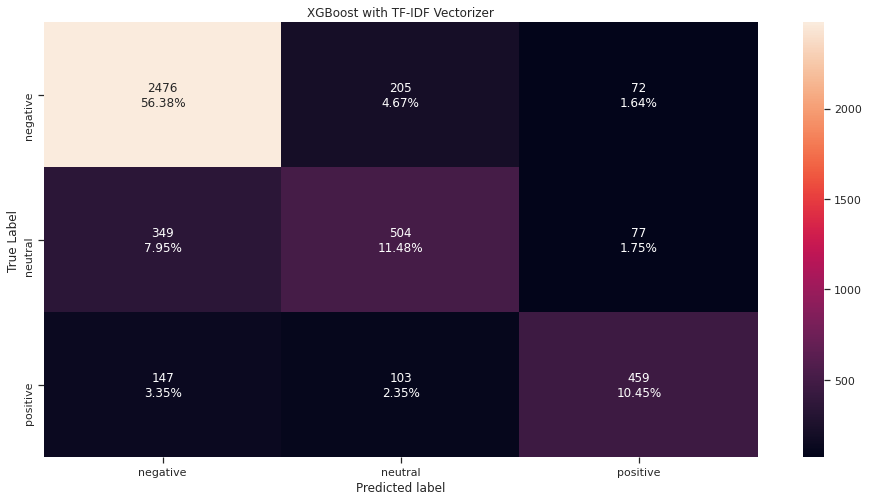


              precision    recall  f1-score   support

    negative     0.8331    0.8994    0.8650      2753
     neutral     0.6207    0.5419    0.5786       930
    positive     0.7549    0.6474    0.6970       709

    accuracy                         0.7830      4392
   macro avg     0.7362    0.6962    0.7136      4392
weighted avg     0.7755    0.7830    0.7772      4392



In [86]:
# Creating a Confusion Matrix for the Tuned Classification Model (XGBoost with TF-IDF Vectorizer)

make_confusion_matrix(model = model_tuning_result_xgboost_tfidf, X_test = X_test, y_test = y_test, plot_title = 'XGBoost with TF-IDF Vectorizer',
                      summary_metrics = True, library = 'sklearn', axis_labels = ('negative', 'neutral', 'positive'))

In [87]:
# Building a Dataframe with the DTM for the Best Selected Model thru Randomized Search Cross-validation
# The Resulting Dataframe will be utilized to Analyze the Features Importance (following step)

# Retrieving the 'TfidfVectorizer' transformation from the model Pipeline and applying a '.fit_transform' on X_train
response_xgboost_tfidf = model_tuning_result_xgboost_tfidf['transformer'].fit_transform(X_train)

# Checking the shape for the DTM
print("The DTM shape is", response_xgboost_tfidf.toarray().shape)

# Creating a dataframe for the DTM including the feature names
X_train_ = pd.DataFrame(response_xgboost_tfidf.toarray(), columns = model_tuning_result_xgboost_tfidf['transformer'].get_feature_names())
X_train_.head()

The DTM shape is (10248, 7000)


aa  aaaand  aaadvantage  aaalwayslate  ...  zrh  zuke  zurich   zz
0  0.0     0.0          0.0           0.0  ...  0.0   0.0     0.0  0.0
1  0.0     0.0          0.0           0.0  ...  0.0   0.0     0.0  0.0
2  0.0     0.0          0.0           0.0  ...  0.0   0.0     0.0  0.0
3  0.0     0.0          0.0           0.0  ...  0.0   0.0     0.0  0.0
4  0.0     0.0          0.0           0.0  ...  0.0   0.0     0.0  0.0

[5 rows x 7000 columns]

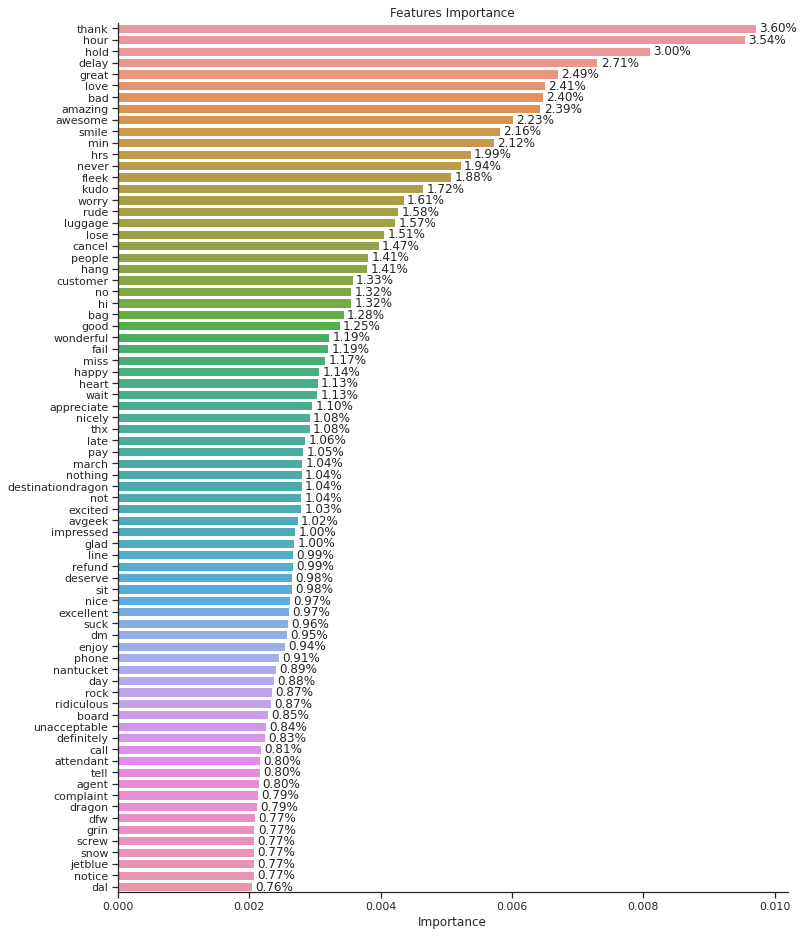

In [88]:
# Features Importance for the Tuned Classification Model (XGBoost with TF-IDF Vectorizer)

features_importance(model = model_tuning_result_xgboost_tfidf.steps[1][1], number_features = 75)

In [89]:
# Obtaining the Relative Importance for each Feature
# This information will be used to create a Wordcloud with the respective weights linked to the Features Importance 

fi_wc_xgboost_tfidf = pd.DataFrame(model_tuning_result_xgboost_tfidf.steps[1][1].feature_importances_, columns = ["Importance"],
                                   index = X_train_.columns).reset_index().sort_values(by = 'Importance', ascending = False)
fi_wc_xgboost_tfidf = fi_wc_xgboost_tfidf.iloc[0 : 200]
fi_wc_xgboost_tfidf.head(5)

index  Importance
6014  thank    0.009712
2896   hour    0.009549
2825   hold    0.008098
1686  delay    0.007303
2606  great    0.006702

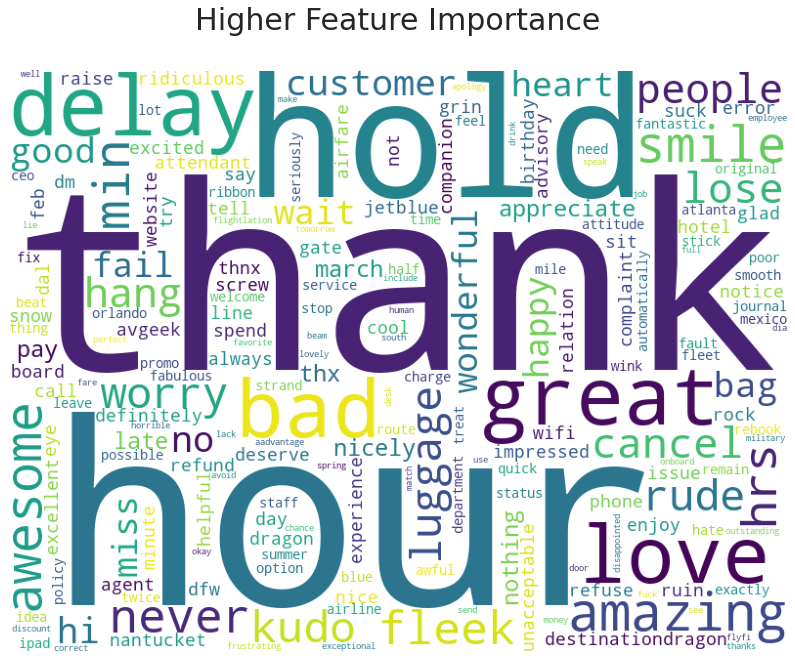

In [90]:
# Creating a Wordcloud based on Frequencies (Variable Importance) using the def Function 'show_wordcloud_with_frequency()'

# Variable Importance Dictionary
dictionary_wc_xgboost_tfidf = fi_wc_xgboost_tfidf.set_index('index').to_dict()['Importance']

# Plotting the Wordcloude based on Frequencies (Variable Importance)
show_wordcloud_with_frequency(dictionary = dictionary_wc_xgboost_tfidf, plot_title = "Higher Feature Importance")

- The Wordcloud above is reflecting the Features Importance for the Tuned XGBoost Classifier with TF-IDF Vectorizer transformation. The information visualized on this Wordcloud is the same as the previous plot for Features Importance. The bigger the words on this Wordcloud the more important they are for the Sentiment Analysis Classification model.

***
## 6. Summarize Understanding of the Application of Various Pre-processing and Vectorization and the Model Performance <a class="anchor" id="666666"></a>

### 6.1 - Summary about the Application of Various Pre-processing and Vectorization

- Sentiment Analysis is a very important task in Natural Language Processing (NLP). Using some important text cleaning techniques, several text documents can be cleaned-up in seconds, compared to the hours it would take to manually complete the same task. The result of that is a leaner dataset, mostly containing the essential words for data mining. There are several techniques which can be utlized for text cleaning - the ones applied in this project were:
    > 1. Remove HTML Tags ('BeautifulSoup' library)
    > 2. Remove HTTP Links (thru Python Regular Expression operations)
    > 3. Remove User Tag @ and its following tagged name/description (thru Python Regular Expression operations)
    > 4. Replace Contractions ('contractions' library)
    > 5. Remove non-letters including removal of any digits (thru Python Regular Expression operations)
    > 6. Remove Accented (non-ASCII) Characters (thru Python Unicode operations)
    > 7. Convert to Lower Case (thru Python 'lower()' operation)
    > 8. Remove Stopwords ('Gensim' library to apply the stopwords, 'nltk' library to apply words tokenization and Python '.join()' operation)
    > 9. Lemmatization ('spaCy' library)
    

- Only by performing the tasks for cleaning the text, it still doesn't allow us to use the data to build a ML model for insights generation, Classification or Clustering. The key here is that once the data is pre-processed with cleaning, then it may be ready to be converted into a structured (tabular) format. Bag of Words or Bag of N-grams (using Count Vectorization) and TF-IDF Vectorization are very popular techniques utilized to convert unstructured text into a tabular format. Each of them will yield a data table (text data in tabular format) which can be fed into a ML algorithm directly.

- Count Vectorized basically looks at each of the documents from a text corpus and checks whether the words are present. If a given word is present, then it’ll look at how many times the word appears, and that particular result will be put in the appropriate Document Term Matrix (DTM) cell (intersection of the column/word vs. document). Because of that, Count Vectorized would consider that all the words are equally important.

- TF-IDF stands for "Term Frequency — Inverse Document Frequency". TF-IDF Vectorized is a technique to quantify a word in multiple documents, we generally compute a weight to each word which signifies the importance of the word in the document and in the text corpus. First, TF-IDF measures the number of times that words appear in a given document (TF - Term Frequency). But because common words frequently appear in all documents, those must be systematically discounted. That’s the inverse-document frequency (IDF) part. The more documents a word appears in, the less valuable that word is as a signal to differentiate any given document. That’s intended to leave only the frequent and distinctive words as markers. 

- Once the cleaned data is converted into a tabular format thru Text Vectorization techniques (such as Count Vectorized or TF-IDF Vectorized), then it's now possible to use Machine Learning algorithms for Classification purpose on a Sentiment Analysis.

- In essence, Sentiment Analysis is the process of determining the emotional tone behind a series of words, used to gain an understanding of the the attitudes, opinions and emotions expressed within an online mention. It can also be an essential part of a Market Research and Customer Service approach, not only to capture what people think about the products or services of a given company but also about the competition.  The overall Customer Experience can be quickly revealed thru Sentiment Analysis, and proper actions can be taken not only to address the negative feedbacks but also to promote the positive sentiments.

### 6.2 - Comparing all Models

In [91]:
# Creating a Dataframe with the Calculated Metric Scores for all Models

# Defining the list of models for comparison
Models = ['Default Random Forest with Count Vectorizer', 'Default XGBoost Forest with Count Vectorizer',
          'Default Random Forest with TF-IDF Vectorizer', 'Default XGBoost Forest with TF-IDF Vectorizer',
          'Tuned Random Forest with Count Vectorizer', 'Tuned XGBoost with Count Vectorizer',
          'Tuned Random Forest with TF-IDF Vectorizer', 'Tuned XGBoost with TF-IDF Vectorizer']

# Retrieving the calculated metrics for all the models (Average Cross-validated Train F1_Score, Test F1_Score and Test Accuracy)
models_train_F1_Score = [comparison_frame_countvec.loc['Random Forest', 'Train_F1_Score'], comparison_frame_countvec.loc['XGBoost', 'Train_F1_Score'],
                         comparison_frame_tfidf.loc['Random Forest', 'Train_F1_Score'], comparison_frame_tfidf.loc['XGBoost', 'Train_F1_Score'],
                         round(grid_cv_rf_countvec.best_score_, 3), round(grid_cv_xgboost_countvec.best_score_, 3),
                         round(grid_cv_rf_tfidf.best_score_, 3), round(grid_cv_xgboost_tfidf.best_score_, 3)]

models_test_F1_Score =  [comparison_frame_countvec.loc['Random Forest', 'Test_F1_Score'], comparison_frame_countvec.loc['XGBoost', 'Test_F1_Score'],
                         comparison_frame_tfidf.loc['Random Forest', 'Test_F1_Score'], comparison_frame_tfidf.loc['XGBoost', 'Test_F1_Score'],
                         test_score_tuning_rf_countvec, test_score_tuning_xgboost_countvec, test_score_tuning_rf_tfidf, test_score_tuning_xgboost_tfidf]

models_test_Accuracy =  [comparison_frame_countvec.loc['Random Forest', 'Test_Accuracy'], comparison_frame_countvec.loc['XGBoost', 'Test_Accuracy'],
                         comparison_frame_tfidf.loc['Random Forest', 'Test_Accuracy'], comparison_frame_tfidf.loc['XGBoost', 'Test_Accuracy'],
                         test_accuracy_rf_countvec, test_accuracy_xgboost_countvec, test_accuracy_rf_tfidf, test_accuracy_xgboost_tfidf]

# Creating the comparison dataframe 
comparison_frame = pd.DataFrame({'Model' : Models, 'Train_F1_Score' : models_train_F1_Score, 'Test_F1_Score' : models_test_F1_Score, 'Test Accuracy' : models_test_Accuracy})
comparison_frame

Model  ...  Test Accuracy
0    Default Random Forest with Count Vectorizer  ...          0.770
1   Default XGBoost Forest with Count Vectorizer  ...          0.791
2   Default Random Forest with TF-IDF Vectorizer  ...          0.777
3  Default XGBoost Forest with TF-IDF Vectorizer  ...          0.781
4      Tuned Random Forest with Count Vectorizer  ...          0.795
5            Tuned XGBoost with Count Vectorizer  ...          0.794
6     Tuned Random Forest with TF-IDF Vectorizer  ...          0.788
7           Tuned XGBoost with TF-IDF Vectorizer  ...          0.783

[8 rows x 4 columns]

In [92]:
# Sorting the Models by F1-Score metric (ascending order)

comparison_frame.sort_values(["Test_F1_Score"], ascending = True, inplace = True)

In [93]:
# Data preparation to create a lineplot with a hue per metric

comparison_frame_melted = pd.melt(frame = comparison_frame, id_vars=['Model'], value_name = 'Metric Value')

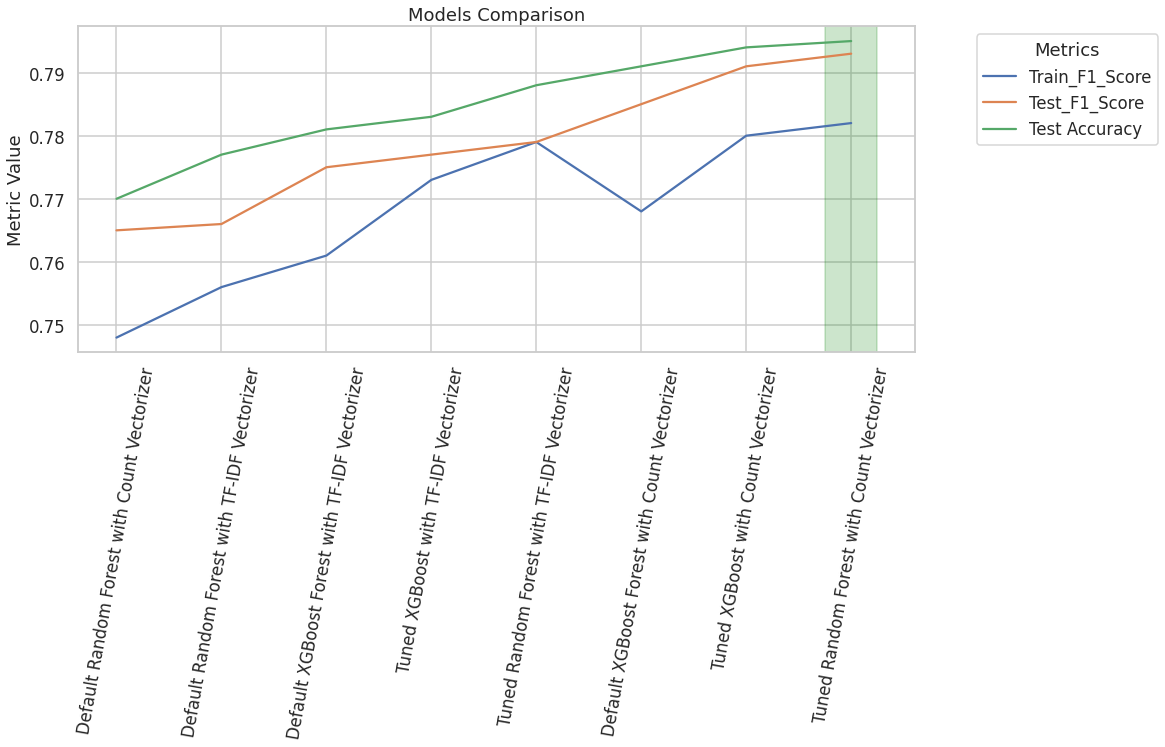

In [94]:
# Lineplot with a hue per metric for all the models, sorted by F1 Score on the Test Set

sns.set({'figure.figsize': (15,6)})
sns.set_style("whitegrid")
sns.set_context("talk")
chart = sns.lineplot(x = "Model", y = "Metric Value", hue = "variable", data = comparison_frame_melted)
chart.figure.canvas.draw()
x = chart.get_xticklabels()
chart.set_xticklabels(x, rotation = 80)
chart.legend(loc = 'upper right', title = 'Metrics', bbox_to_anchor=(1.3, 1))
chart.axvspan(6.75, 7.25, color = 'green', alpha = 0.2)
plt.title("Models Comparison")
chart.set(xlabel = None);

- Based on the models comparison summary given at the lineplot above, the Tuned Random Forest with Count Vectorizer transformation (highlighted in "green" on the plot above) is considered to be the best Classifier for this Sentiment Analysis. It got a resulting Weighted F1_Score of 0.793 of an Accuracy of 0.795 (both on the Test data).

### 6.3 - Additional Takeaways

- Important insights from the Exploratory Data Analysis (EDA) session:

    - On the 10 categories associated with the reasons the Customers expressed their negative sentiments. The 'Customer Service Issue' was the most frequent reason with 31.71% of the occurrences. For the top 05 ocurrences, the 'Customer Service Issue' was followed by "Late Flight", "Can't Tell", "Cancelled Flight" and "Lost Luggage" with 18.14%, 12.97%, 9.23% and 7.89% respectively. These insights also matched with the Wordcloud for Negative Reviews (after text pre-processing/cleaning) - with that, it's concluded that the cleaned corpus with the Negative Reviews itself was able to capture the key reasons the Customers expressed their dissatisfaction or negative sentiments.
    
    - The airline companies with most of the tweets ('United', 'US Airways' and 'American') are also the ones with the highest percentage of 'negative' sentiments. 'United', 'US Airways' and 'American' have 68.89%, 77.69% and 71.04% of 'negative' sentiments, respectively. 'Southwest' and 'Delta' had an intermediate number of tweets, with 49.01% and 42.98% of negative sentiments respectively. 'Virgin America' has the least amount of tweats and the highest percentage of 'positive' sentiments (30.16%), and the lowest percentage of 'negative' sentiments (35.91%). The fact that 'Virgin America' has the highest percentage of 'positive' sentiments can be used to understand how the other Airline Companies can improve.

    - The negative reason with highest percentage for the Airline Companies with most of the tweets ('United', 'US Airways' and 'American') was 'Customer Service Issue', with 25.86%, 35.84% and 39.18% respectively. For these same Airline Companies, the second most frequent negative reason was 'Late Flight', however the frequency of late flights for 'American' (12.70%) were considerably lower than the frequency of late flights for 'United' (19.94%) and 'US Airways' (20.02%). For 'Delta', the frequency of negative reasons related to late flights (28.17%) is much higher compared to the other airline companies. Conversely to that, 'Virgin America' takes the lowest frequency of negative reasons related to late flights (9.39%) compared to the other airline companies. These most frequent reasons for Customer dissatisfaction on each Airline Company (and comparing them as such) can be used to prioritize actions for improvement focused on Customer satisfaction.

    - The most frequent hours for tweets are overlapping with the regular business hours (7am - 6pm). The number of tweets related to all Airline Companies was skewed towards the end of the week.The total frequency of tweets and the frequency of 'negative' sentiments is much higher along the 03 first days of the week ('Sun', 'Mon' and 'Tue'). This might be an important pattern to be further explored to prioritize improvement actions at these specific hours and days of the week.
    
    
- The data from Twitter was collected only along 09 consecutive days in Feb 2015 (02/16/2015 to 02/24/2015). Ideally more data should be in place to build an adequate model for production. A robust prediction model (adequate for production) for Sentiment Analysis would allow the Airline Companies to quickly predict whether the Customers are satisfied "on the fly". Some 6-Sigma techniques like Control Charts (Statistical process Control) could also be leveraged to visualize variation for the occurrence of negative sentiments, find and correct problems immediately when they occur, predict expected ranges of outcomes and analyze patterns of process variation from Special or Common Causes.